# https://grok.com/c/71470a46-9c00-4561-8b8d-357bc30a3276

# https://grok.com/c/673d6a9b-c87f-44d8-88f7-046ba1ddb1ad

# https://gemini.google.com/app/2688413b10c7f6f2

# Bivariate Analysis

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, f_oneway, chi2_contingency
import numpy as np

url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"

df = pd.read_csv(url)
df.rename(columns={'TransactionPrice  ': 'TransactionPrice'}, inplace=True)
# Convert 'ParcelArea' to string type before extracting numerical values
df['Parcel_sq_m'] = df['ParcelArea'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['Price_per_sq_m'] = df['TransactionPrice'] / df['Parcel_sq_m']
df['Year'] = pd.to_datetime(df['TransactionDate'], format='%b-%y').dt.year

# Convert 'UnitLevel' to numeric, coercing errors
# df['UnitLevel'] = pd.to_numeric(df['UnitLevel'], errors='coerce')
# Drop rows with NaN in 'UnitLevel' for correlation calculation
# df_corr = df.dropna(subset=['UnitLevel']).copy()

# Clean UnitLevel
unit_level_map = {'03A': 4, '12B': 12, '13A': 14, '23A': 24, '33A': 34, '43A': 44, '53A': 54,
                  'B': 0, 'D': 0, 'G': 0, 'LG': 0, 'MZ': 0, 'P': 0, 'UG': 0,
                  '1/5/2025': 0, '2/3/2025': 0, '1/4/2025': 0}
df['UnitLevel_clean'] = df['UnitLevel'].replace(unit_level_map)
unit_level_mean = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').mean()
df['UnitLevel'] = pd.to_numeric(df['UnitLevel_clean'], errors='coerce').fillna(unit_level_mean).astype(np.float32)


# Numerical-Numerical: Correlations
print("Correlation Price and Parcel_sq_m:", pearsonr(df['TransactionPrice'], df['Parcel_sq_m']))
print("Correlation Price and UnitLevel:", pearsonr(df['TransactionPrice'], df['UnitLevel']))
print("Correlation Price_per_sq_m and UnitLevel:", pearsonr(df['Price_per_sq_m'], df['UnitLevel']))

# Categorical-Numerical: Group Means & ANOVA
print("Price by Mukim:\n", df.groupby('Mukim')['TransactionPrice'].agg(['mean', 'median', 'std', 'count']))
anova_mukim = f_oneway(*[group['TransactionPrice'].values for name, group in df.groupby('Mukim')])
print("ANOVA Price by Mukim:", anova_mukim)

print("Price by Tenure:\n", df.groupby('Tenure')['TransactionPrice'].agg(['mean', 'median', 'std', 'count']))
anova_tenure = f_oneway(*[group['TransactionPrice'].values for name, group in df.groupby('Tenure')])
print("ANOVA Price by Tenure:", anova_tenure)

print("Price by Year:\n", df.groupby('Year')['TransactionPrice'].agg(['mean', 'median', 'std', 'count']))
anova_year = f_oneway(*[group['TransactionPrice'].values for name, group in df.groupby('Year')])
print("ANOVA Price by Year:", anova_year)

print("Price_per_sq_m by Mukim:\n", df.groupby('Mukim')['Price_per_sq_m'].agg(['mean', 'median', 'std']))

# Categorical-Categorical: Cross-Tabs
print("Cross-Tab Mukim and Tenure:\n", pd.crosstab(df['Mukim'], df['Tenure'], normalize='index') * 100)  # Percentages
print("Chi-Square Mukim-Tenure:", chi2_contingency(pd.crosstab(df['Mukim'], df['Tenure'])))

print("Cross-Tab Mukim and Year:\n", pd.crosstab(df['Mukim'], df['Year'], normalize='index') * 100)
print("Chi-Square Mukim-Year:", chi2_contingency(pd.crosstab(df['Mukim'], df['Year'])))

print("Cross-Tab Tenure and Year:\n", pd.crosstab(df['Tenure'], df['Year'], normalize='index') * 100)
print("Chi-Square Tenure-Year:", chi2_contingency(pd.crosstab(df['Tenure'], df['Year'])))

Correlation Price and Parcel_sq_m: PearsonRResult(statistic=np.float64(0.8395011463594014), pvalue=np.float64(0.0))
Correlation Price and UnitLevel: PearsonRResult(statistic=np.float64(0.11774964716324847), pvalue=np.float64(1.3246215888485679e-45))
Correlation Price_per_sq_m and UnitLevel: PearsonRResult(statistic=np.float64(0.27009653710661635), pvalue=np.float64(4.909226027217339e-239))
Price by Mukim:
                                   mean    median           std  count
Mukim                                                                
Kuala Lumpur Town Centre  1.300137e+06  738500.0  1.464420e+06   2000
Mukim Ampang              5.325796e+05  420000.0  5.132969e+05    157
Mukim Batu                1.064629e+06  809000.0  7.805267e+05   3842
Mukim Cheras              5.710465e+05  570000.0  2.378691e+05     43
Mukim Kuala Lumpur        1.004989e+06  540000.0  1.330236e+06   2943
Mukim Petaling            5.584163e+05  495000.0  2.937337e+05   2856
Mukim Setapak             5.02

In [ ]:
print(df['UnitLevel'].value_counts())

UnitLevel
7.00000     629
9.00000     625
6.00000     624
2.00000     612
8.00000     611
3.00000     609
11.00000    600
10.00000    594
5.00000     566
12.00000    555
1.00000     539
4.00000     516
14.00000    504
15.00000    499
13.00000    485
16.00000    463
18.00000    424
17.00000    414
19.00000    334
21.00000    310
22.00000    306
20.00000    300
23.00000    278
0.00000     244
25.00000    237
26.00000    211
24.00000    205
27.00000    204
29.00000    168
34.00000    147
30.00000    146
31.00000    145
32.00000    144
33.00000    137
28.00000    136
36.00000    135
35.00000    125
37.00000    116
38.00000     95
39.00000     91
40.00000     66
41.00000     51
44.00000     44
42.00000     37
14.44015     31
43.00000     29
45.00000     14
46.00000     13
47.00000      4
50.00000      4
54.00000      4
48.00000      3
51.00000      3
55.00000      2
49.00000      1
52.00000      1
53.00000      1
57.00000      1
Name: count, dtype: int64


# Boxplot for Price by Mukim:

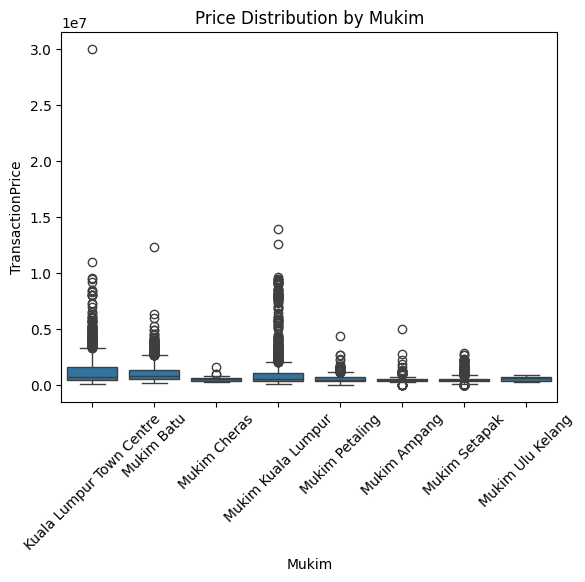

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Mukim', y='TransactionPrice', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Mukim')
plt.show()

/tmp/ipython-input-3130785555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_price_by_mukim.index, y=average_price_by_mukim.values, palette='viridis')


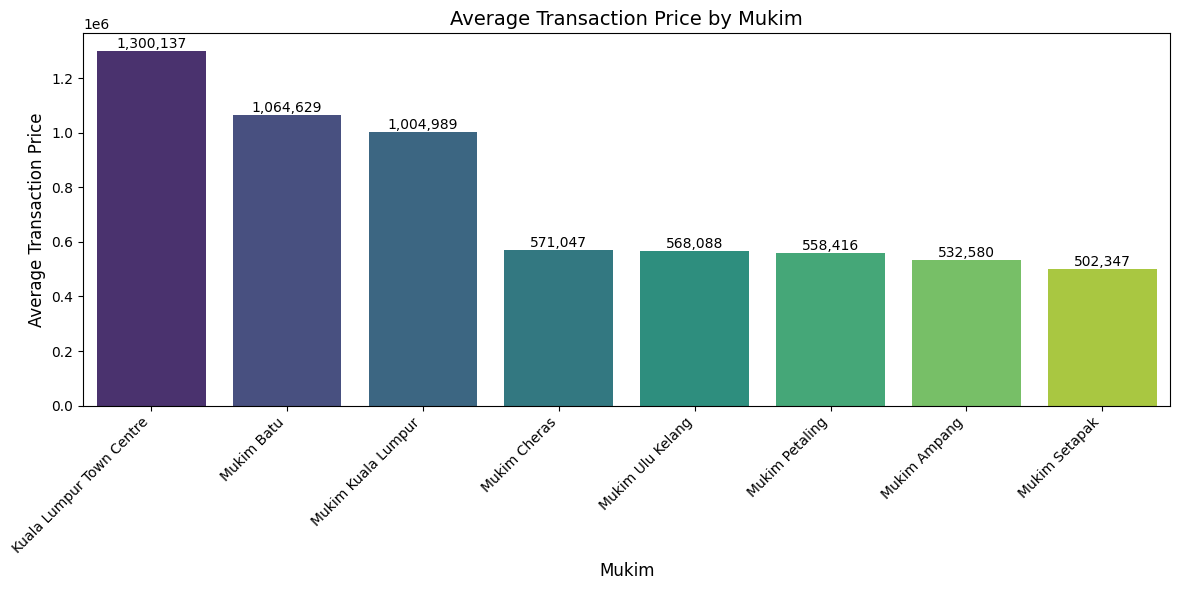

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average transaction price per mukim
average_price_by_mukim = df.groupby('Mukim')['TransactionPrice'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_price_by_mukim.index, y=average_price_by_mukim.values, palette='viridis')

# Add labels and title
plt.xlabel('Mukim', fontsize=12)
plt.ylabel('Average Transaction Price', fontsize=12)
plt.title('Average Transaction Price by Mukim', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add the average price values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipython-input-1686682803.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_price_by_mukim.values, y=average_price_by_mukim.index, palette='viridis', orient='h')


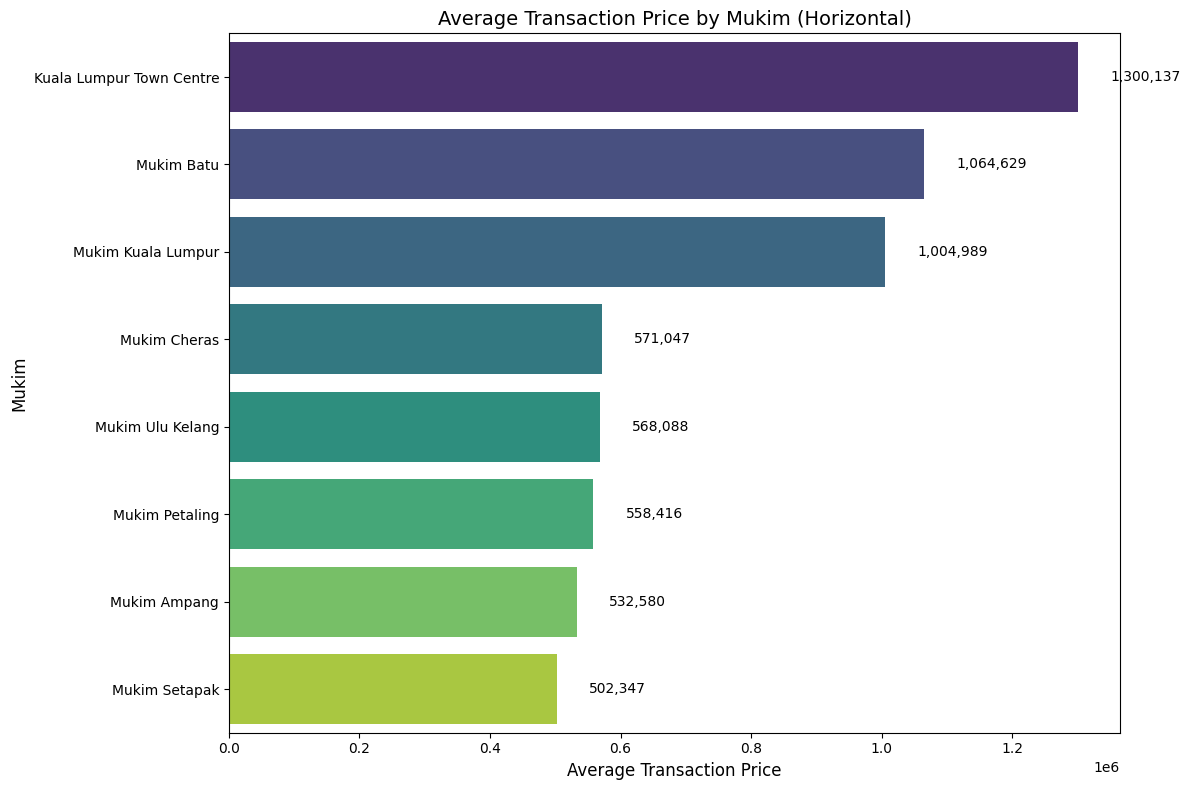

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average transaction price per mukim
average_price_by_mukim = df.groupby('Mukim')['TransactionPrice'].mean().sort_values(ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=average_price_by_mukim.values, y=average_price_by_mukim.index, palette='viridis', orient='h')

# Add labels and title
plt.xlabel('Average Transaction Price', fontsize=12)
plt.ylabel('Mukim', fontsize=12)
plt.title('Average Transaction Price by Mukim (Horizontal)', fontsize=14)

# Add the average price values on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 50000, p.get_y() + p.get_height() / 2.,
             f'{width:,.0f}',
             ha='left', va='center', fontsize=10)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipython-input-4042009356.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=median_price_by_mukim.values, y=median_price_by_mukim.index, palette='viridis', orient='h')


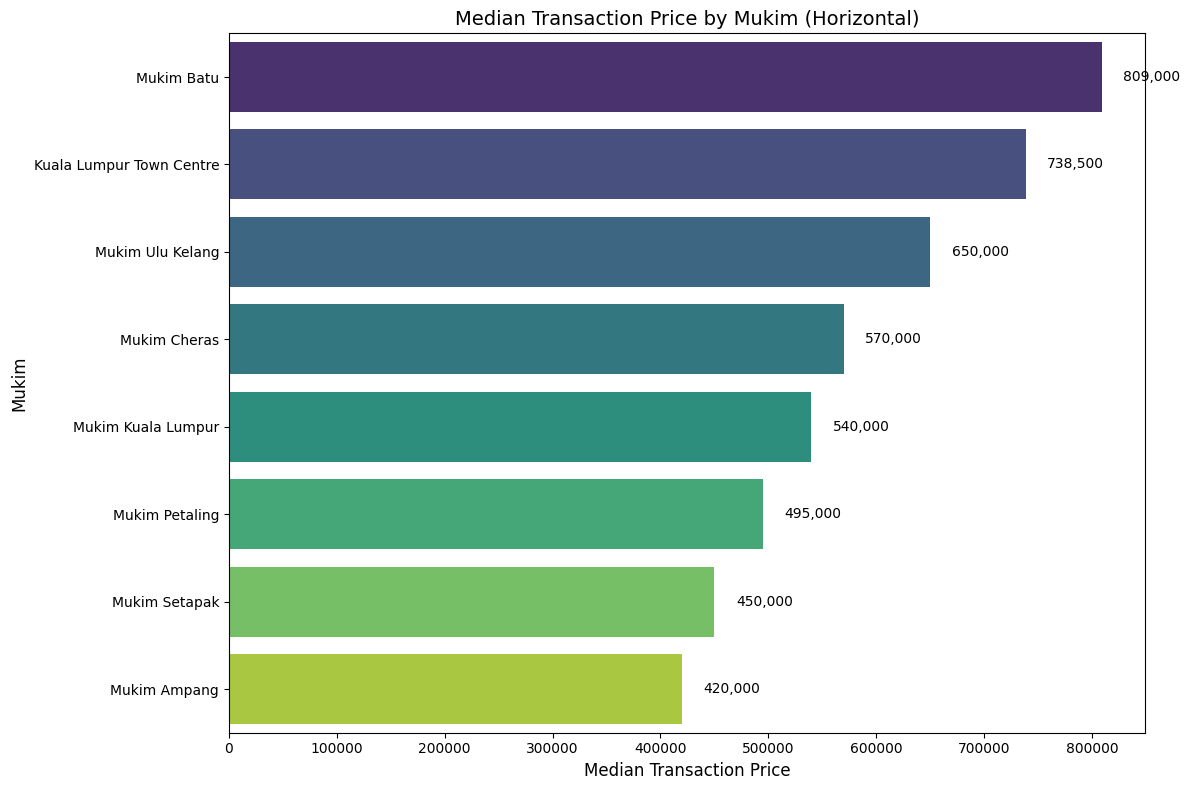

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the median transaction price per mukim
median_price_by_mukim = df.groupby('Mukim')['TransactionPrice'].median().sort_values(ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=median_price_by_mukim.values, y=median_price_by_mukim.index, palette='viridis', orient='h')

# Add labels and title
plt.xlabel('Median Transaction Price', fontsize=12)
plt.ylabel('Mukim', fontsize=12)
plt.title('Median Transaction Price by Mukim (Horizontal)', fontsize=14)

# Add the median price values on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 20000, p.get_y() + p.get_height() / 2.,
             f'{width:,.0f}',
             ha='left', va='center', fontsize=10)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipython-input-855536352.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_price_per_sq_m_by_mukim.values, y=average_price_per_sq_m_by_mukim.index, palette='viridis', orient='h')


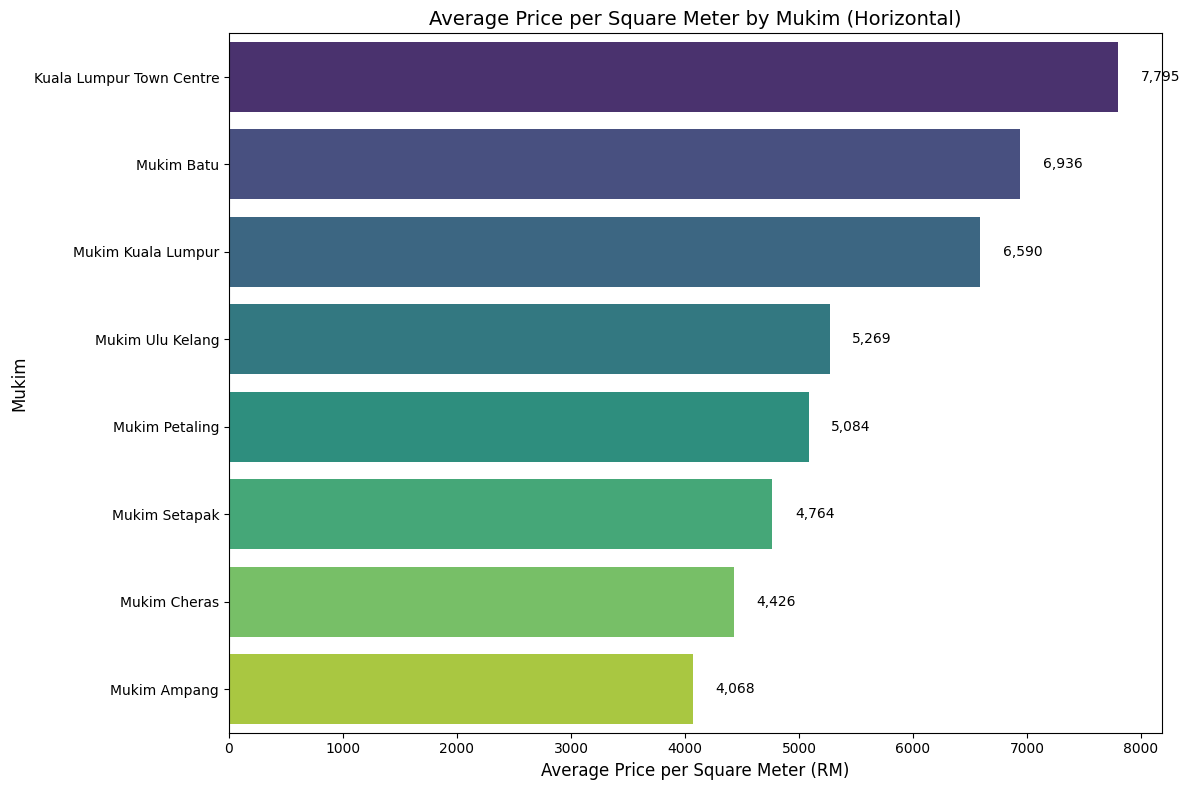

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average price per square meter per mukim
average_price_per_sq_m_by_mukim = df.groupby('Mukim')['Price_per_sq_m'].mean().sort_values(ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=average_price_per_sq_m_by_mukim.values, y=average_price_per_sq_m_by_mukim.index, palette='viridis', orient='h')

# Add labels and title
plt.xlabel('Average Price per Square Meter (RM)', fontsize=12)
plt.ylabel('Mukim', fontsize=12)
plt.title('Average Price per Square Meter by Mukim (Horizontal)', fontsize=14)

# Add the average price per square meter values on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 200, p.get_y() + p.get_height() / 2.,
             f'{width:,.0f}',
             ha='left', va='center', fontsize=10)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calculate the average transaction price per mukim
average_price_by_mukim = df.groupby('Mukim')['TransactionPrice'].mean().sort_values(ascending=False)

# Display the top 5
print("Top 5 Average Transaction Price by Mukim:\n")
display(average_price_by_mukim.head().to_frame())

Top 5 Average Transaction Price by Mukim:



,TransactionPrice
Mukim,
Kuala Lumpur Town Centre,1.300137e+06
Mukim Batu,1.064629e+06
Mukim Kuala Lumpur,1.004989e+06
Mukim Cheras,5.710465e+05
Mukim Ulu Kelang,5.680877e+05


# Price_per_sq_m vs. Parcel_sq_m Correlation

In [ ]:
print("Correlation Price_per_sq_m and Parcel_sq_m:", pearsonr(df['Price_per_sq_m'], df['Parcel_sq_m']))

Correlation Price_per_sq_m and Parcel_sq_m: PearsonRResult(statistic=np.float64(0.3580080999824564), pvalue=np.float64(0.0))


# Price per sq meter vs Tenure correlation (ANOVA)

In [6]:
from scipy.stats import f_oneway

# Perform ANOVA on 'Price_per_sq_m' by 'Tenure'
anova_price_per_sq_m_tenure = f_oneway(*[group['Price_per_sq_m'].values for name, group in df_cleaned.groupby('Tenure')])

print(f"ANOVA Price_per_sq_m by Tenure: {anova_price_per_sq_m_tenure}")

ANOVA Price_per_sq_m by Tenure: F_onewayResult(statistic=np.float64(981.060938983747), pvalue=np.float64(2.1538571551236697e-208))


# Price_per_sq_m vs. Tenure encoded Correlation (Pearson)

In [5]:
from scipy.stats import pearsonr

# Create a numerical representation for 'Tenure'
df_cleaned['Tenure_numeric'] = df_cleaned['Tenure'].map({'Leasehold': 0, 'Freehold': 1})

# Calculate Pearson correlation between 'Price_per_sq_m' and 'Tenure_numeric'
correlation_price_per_sq_m_tenure = pearsonr(df_cleaned['Price_per_sq_m'], df_cleaned['Tenure_numeric'])

print(f"Correlation Price_per_sq_m and Tenure: {correlation_price_per_sq_m_tenure}")

Correlation Price_per_sq_m and Tenure: PearsonRResult(statistic=np.float64(0.25263648492735097), pvalue=np.float64(2.1538571551274174e-208))


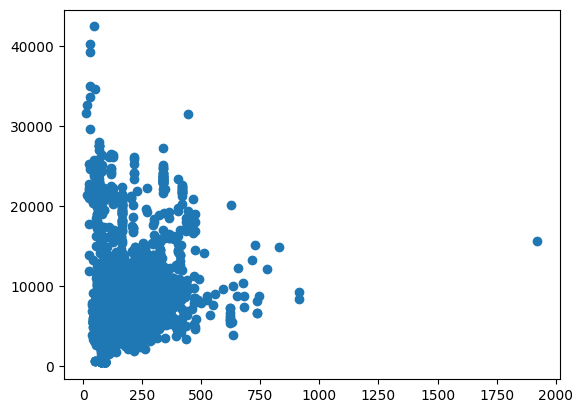

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Parcel_sq_m'], df['Price_per_sq_m'])

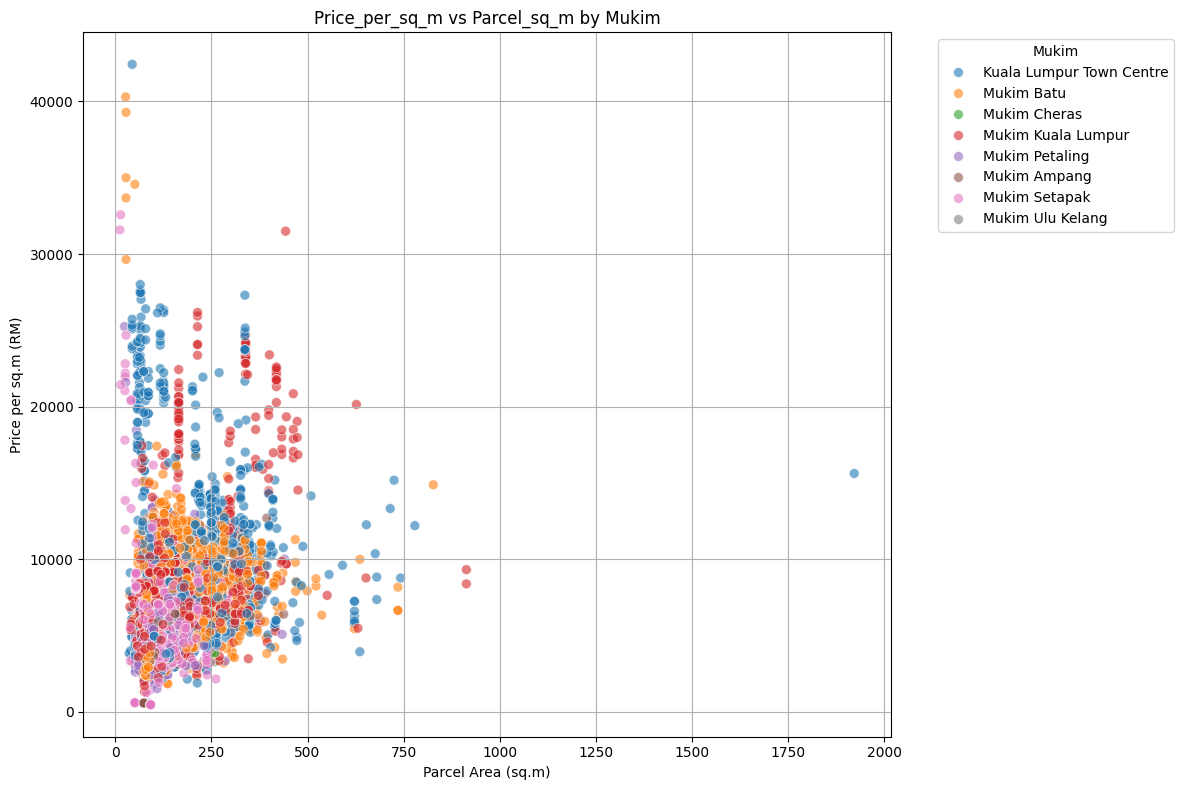

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Parcel_sq_m', y='Price_per_sq_m', hue='Mukim', alpha=0.6, s=50)
plt.title('Price_per_sq_m vs Parcel_sq_m by Mukim')
plt.xlabel('Parcel Area (sq.m)')
plt.ylabel('Price per sq.m (RM)')
plt.grid(True)
plt.legend(title='Mukim', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Based on the scatter plot of `Price_per_sq_m` vs `Parcel_sq_m` by `Mukim`, we can observe the following:

*   **General Trend:** There seems to be a weak positive correlation between `Price_per_sq_m` and `Parcel_sq_m`. As the parcel area increases, the price per square meter tends to slightly increase, although there is a lot of variation.
*   **Mukim Influence:** The `Mukim` variable appears to have a significant impact on both `Price_per_sq_m` and the distribution of `Parcel_sq_m`. Different Mukims occupy distinct clusters in the scatter plot, indicating that location is a strong factor influencing price and potentially the size of properties available.
*   **Outliers:** There are some data points that appear to be outliers, with very high `Price_per_sq_m` or `Parcel_sq_m` values compared to the majority of the data within their respective Mukims. These could warrant further investigation.
*   **Mukim-Specific Patterns:** Some Mukims show a clearer trend or a more concentrated cluster of data points than others. For example, some Mukims might have a wider range of parcel areas and prices, while others are more homogenous.

**Interpretation of the LOWESS plot (Price_per_sq_m vs Parcel_sq_m):**

The red line in the scatter plot is a LOWESS (Locally Weighted Scatterplot Smoothing) line. This line helps to visualize the trend in the data without assuming a specific functional form (like a straight line).

Looking at the LOWESS line, we can observe:

*   **Initial Increase:** The line shows a relatively steep increase in `Price_per_sq_m` as `Parcel_sq_m` increases for smaller parcel areas.
*   **Slowing Increase (Diminishing Effect):** As the `Parcel_sq_m` continues to increase, the slope of the LOWESS line becomes less steep and appears to flatten out. This indicates that the rate at which the `Price_per_sq_m` increases slows down for larger parcel areas.
*   **Conclusion:** The LOWESS line visually supports the idea of a diminishing effect of parcel area on price per square meter. While larger parcel areas are associated with higher prices per square meter, the increase in price per square meter is less pronounced for larger properties compared to smaller ones.

This suggests that beyond a certain point, adding more area to a parcel doesn't contribute as much to the price per square meter as it does for smaller properties.

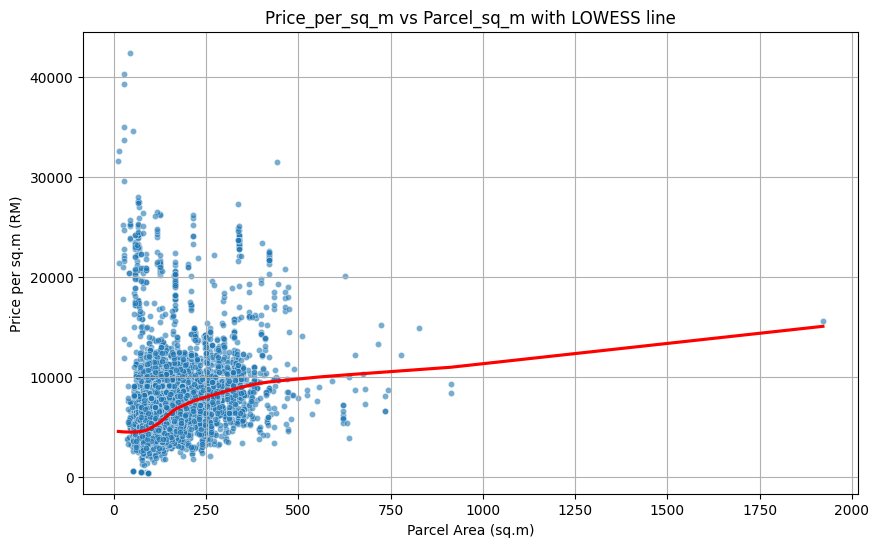

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Parcel_sq_m', y='Price_per_sq_m', alpha=0.6, s=20)
sns.regplot(data=df, x='Parcel_sq_m', y='Price_per_sq_m', scatter=False, lowess=True, color='red')
plt.title('Price_per_sq_m vs Parcel_sq_m with LOWESS line')
plt.xlabel('Parcel Area (sq.m)')
plt.ylabel('Price per sq.m (RM)')
plt.grid(True)
plt.show()

# Mukim-Tenure-Year Cross-Tab:

In [ ]:
print(pd.crosstab([df['Mukim'], df['Tenure']], df['Year'], normalize='index') * 100)

Year                                     2021        2022       2023  \
Mukim                    Tenure                                        
Kuala Lumpur Town Centre Freehold    7.577640   26.397516  30.372671   
                         Leasehold  13.846154   26.153846  29.487179   
Mukim Ampang             Freehold   31.818182   31.818182   9.090909   
                         Leasehold   6.666667   22.962963  30.370370   
Mukim Batu               Freehold   11.302211   29.207617  29.883292   
                         Leasehold  12.457338   35.665529  30.887372   
Mukim Cheras             Freehold    9.756098   56.097561  12.195122   
                         Leasehold   0.000000  100.000000   0.000000   
Mukim Kuala Lumpur       Freehold    9.120789   29.252260  32.128184   
                         Leasehold  15.469293   31.228273  32.444959   
Mukim Petaling           Freehold   13.887167   33.539988  27.650341   
                         Leasehold  14.078842   33.145615  30.08

# Boxplot for Price_per_sq_m by Mukim

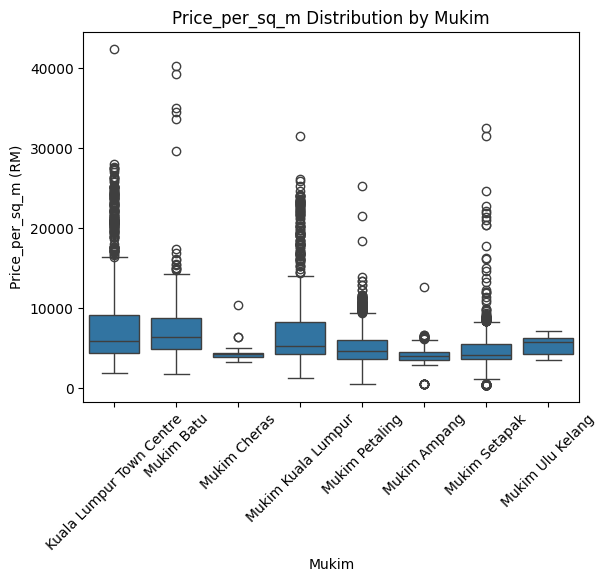

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Mukim', y='Price_per_sq_m', data=df)
plt.xticks(rotation=45)
plt.title('Price_per_sq_m Distribution by Mukim')
plt.ylabel('Price_per_sq_m (RM)')
plt.show()

# Price_per_sq_m ANOVA by *Mukim*

In [ ]:
from scipy.stats import f_oneway
anova_price_per_mukim = f_oneway(*[group['Price_per_sq_m'].values for name, group in df.groupby('Mukim')])
print("ANOVA Price_per_sq_m by Mukim:", anova_price_per_mukim)

ANOVA Price_per_sq_m by Mukim: F_onewayResult(statistic=np.float64(254.36158024420325), pvalue=np.float64(0.0))


In [ ]:
highest_price_per_sq_m = df['Price_per_sq_m'].max()
print(f"The highest price per square meter is: {highest_price_per_sq_m:.2f} RM")

record_highest_price_per_sq_m = df[df['Price_per_sq_m'] == highest_price_per_sq_m].copy()
record_highest_price_per_sq_m['Price_per_sq_ft'] = record_highest_price_per_sq_m['Price_per_sq_m'] / 10.7639

print("\nRecord(s) with the highest price per square meter:")
display(record_highest_price_per_sq_m)

The highest price per square meter is: 42431.82 RM

Record(s) with the highest price per square meter:


,PropertyType,District,Mukim,SchemeName,TransactionDate,Tenure,ParcelArea,Unit,UnitLevel,TransactionPrice,PropertyType(strata),Sector,State,Parcel_sq_m,Price_per_sq_m,Year,UnitLevel_clean,Price_per_sq_ft
8841,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,THE ORION,Nov-24,Freehold,44.0,sq.m,54.0,1867000,Strata,Residential,WP Kuala Lumpur,44.0,42431.818182,2024,54,3942.048717


In [ ]:
# 1 square meter = 10.7639 square feet
df['Price_per_sq_ft'] = df['Price_per_sq_m'] / 10.7639

print("First 5 rows with the new 'Price_per_sq_ft' column:")
display(df.head())

First 5 rows with the new 'Price_per_sq_ft' column:


,PropertyType,District,Mukim,SchemeName,TransactionDate,Tenure,ParcelArea,Unit,UnitLevel,TransactionPrice,PropertyType(strata),Sector,State,Parcel_sq_m,Price_per_sq_m,Year,UnitLevel_clean,Price_per_sq_ft
0,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,FERNLEA COURT,Aug-22,Freehold,169.0,sq.m,1.0,1060000,Strata,Residential,WP Kuala Lumpur,169.0,6272.189349,2022,1,582.706022
1,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,SRI MURNI CONDO,Aug-22,Freehold,279.0,sq.m,1.0,1530000,Strata,Residential,WP Kuala Lumpur,279.0,5483.870968,2022,1,509.468777
2,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,GEMILANG INDAH,Aug-22,Freehold,84.0,sq.m,1.0,300000,Strata,Residential,WP Kuala Lumpur,84.0,3571.428571,2022,1,331.796893
3,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,DAMAI SURIA,Sep-22,Freehold,374.0,sq.m,1.0,2800000,Strata,Residential,WP Kuala Lumpur,374.0,7486.631016,2022,1,695.531454
4,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,BANGSAR HEIGHTS,Sep-22,Freehold,84.0,sq.m,1.0,650000,Strata,Residential,WP Kuala Lumpur,84.0,7738.095238,2022,1,718.893267


# UNit Level Encoding

In [ ]:
import pandas as pd
import statsmodels.api as sm
from datetime import datetime
import numpy as np # Import numpy

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv')

# Data cleaning and preprocessing
# Clean ParcelArea (extract numeric part before ",sq.m")
df['ParcelArea'] = df['ParcelArea'].astype(str).str.extract('(\d+\.?\d*)').astype(np.float32)

# Convert UnitLevel to numeric
unit_level_map = {'13A': 14, '3A': 4,'12B': 13, 'UG': 0,'LG': 0 , 'P': 12,'B': -1, 'D': 12, 'MZ': 12,'03A': 4,'23A': 24, '43A': 44, '23A': 24, '31A': 32, '33A': 34, '53A': 54, 'G': 0,
                  '1/5/2025': 12, '2/3/2025': 12, '1/4/2025': 12}
df['UnitLevel_clean'] = df['UnitLevel'].replace(unit_level_map)
df['Level_numeric'] = pd.to_numeric(df['UnitLevel_clean'], errors='coerce')

# Validate the Level_numeric column
print("\nData type of Level_numeric:", df['Level_numeric'].dtype)
print("\nFirst 5 values of Level_numeric:")
print(df['Level_numeric'].head())

print("\nValue counts of Level_numeric (sorted by count descending):")
print(df['Level_numeric'].value_counts().sort_values(ascending=False))

# Show mapping of old and new values for non-numeric original UnitLevel
print("\nMapping of original non-numeric UnitLevel to Level_numeric:")
mapping_df = df[['UnitLevel', 'Level_numeric']].drop_duplicates().dropna()
non_numeric_mapping_df = mapping_df[mapping_df['UnitLevel'].apply(lambda x: not x.isdigit())].sort_values(by='Level_numeric')
display(non_numeric_mapping_df)

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1079395909.py:11: SyntaxWarning: invalid escape sequence '\d'
  df['ParcelArea'] = df['ParcelArea'].astype(str).str.extract('(\d+\.?\d*)').astype(np.float32)



Data type of Level_numeric: float64

First 5 values of Level_numeric:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Level_numeric, dtype: float64

Value counts of Level_numeric (sorted by count descending):
Level_numeric
 7.0     629
 9.0     625
 6.0     624
 2.0     612
 8.0     611
 3.0     609
 11.0    600
 10.0    594
 12.0    577
 5.0     566
 4.0     542
 1.0     539
 14.0    504
 15.0    499
 13.0    486
 16.0    463
 18.0    424
 17.0    414
 19.0    334
 21.0    310
 22.0    306
 20.0    300
 23.0    278
 25.0    237
 0.0     215
 26.0    211
 24.0    205
 27.0    204
 29.0    168
 34.0    147
 30.0    146
 32.0    145
 31.0    145
 33.0    137
 28.0    136
 36.0    135
 35.0    125
 37.0    116
 38.0     95
 39.0     91
 40.0     66
 41.0     51
 44.0     44
 42.0     37
 43.0     29
 45.0     14
 46.0     13
-1.0       6
 50.0      4
 47.0      4
 54.0      4
 48.0      3
 51.0      3
 55.0      2
 49.0      1
 53.0      1
 52.0      1
 57.0      1
Name: count, dtype:

,UnitLevel,Level_numeric
5374,B,-1.0
4778,G,0.0
10666,UG,0.0
4808,LG,0.0
3784,3A,4.0
5447,03A,4.0
4813,P,12.0
5433,MZ,12.0
5375,D,12.0
12894,12B,13.0


# Validation

In [1]:
import pandas as pd
from scipy.stats import pearsonr, f_oneway, chi2_contingency

url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"
df = pd.read_csv(url)
df.rename(columns={'TransactionPrice  ': 'TransactionPrice'}, inplace=True)

# Convert 'ParcelArea' to numeric, coercing errors to NaN
df['Parcel_sq_m'] = pd.to_numeric(df['ParcelArea'], errors='coerce')

# Drop rows with NaN in 'Parcel_sq_m' for calculations that require it
df_cleaned = df.dropna(subset=['Parcel_sq_m']).copy()


df_cleaned['Price_per_sq_m'] = df_cleaned['TransactionPrice'] / df_cleaned['Parcel_sq_m']
df_cleaned['Year'] = pd.to_datetime(df_cleaned['TransactionDate'], format='%b-%y').dt.year

# Convert 'UnitLevel' to numeric, coercing errors
# df_cleaned['UnitLevel'] = pd.to_numeric(df_cleaned['UnitLevel'], errors='coerce')

# Convert UnitLevel to numeric
unit_level_map = {'13A': 14, '3A': 4,'12B': 13, 'UG': 0,'LG': 0 , 'P': 12,'B': -1, 'D': 12, 'MZ': 12,'03A': 4,'23A': 24, '43A': 44, '23A': 24, '31A': 32, '33A': 34, '53A': 54, 'G': 0,
                  '1/5/2025': 12, '2/3/2025': 12, '1/4/2025': 12}
df_cleaned['UnitLevel_clean'] = df_cleaned['UnitLevel'].replace(unit_level_map)
df_cleaned['UnitLevel'] = pd.to_numeric(df_cleaned['UnitLevel_clean'], errors='coerce')

# Drop rows with NaN in 'UnitLevel' for correlation calculation
df_corr = df_cleaned.dropna(subset=['UnitLevel']).copy()


# Numerical-Numerical: Correlations
print("Correlation Price and Parcel_sq_m:", pearsonr(df_cleaned['TransactionPrice'], df_cleaned['Parcel_sq_m']))
print("Correlation Price and UnitLevel:", pearsonr(df_corr['TransactionPrice'], df_corr['UnitLevel']))
print("Correlation Price_per_sq_m and UnitLevel:", pearsonr(df_corr['Price_per_sq_m'], df_corr['UnitLevel']))

# Categorical-Numerical: Group Means & ANOVA
print("Price by Mukim:\n", df_cleaned.groupby('Mukim')['TransactionPrice'].agg(['mean', 'median', 'std', 'count']))
anova_mukim = f_oneway(*[group['TransactionPrice'].values for name, group in df_cleaned.groupby('Mukim')])
print("ANOVA Price by Mukim:", anova_mukim)

print("Price by Tenure:\n", df_cleaned.groupby('Tenure')['TransactionPrice'].agg(['mean', 'median', 'std', 'count']))
anova_tenure = f_oneway(*[group['TransactionPrice'].values for name, group in df_cleaned.groupby('Tenure')])
print("ANOVA Price by Tenure:", anova_tenure)

print("Price by Year:\n", df_cleaned.groupby('Year')['TransactionPrice'].agg(['mean', 'median', 'std', 'count']))
anova_year = f_oneway(*[group['TransactionPrice'].values for name, group in df_cleaned.groupby('Year')])
print("ANOVA Price by Year:", anova_year)

print("Price_per_sq_m by Mukim:\n", df_cleaned.groupby('Mukim')['Price_per_sq_m'].agg(['mean', 'median', 'std']))

# Categorical-Categorical: Cross-Tabs
print("Cross-Tab Mukim and Tenure:\n", pd.crosstab(df_cleaned['Mukim'], df_cleaned['Tenure'], normalize='index') * 100)  # Percentages
print("Chi-Square Mukim-Tenure:", chi2_contingency(pd.crosstab(df_cleaned['Mukim'], df_cleaned['Tenure'])))

print("Cross-Tab Mukim and Year:\n", pd.crosstab(df_cleaned['Mukim'], df_cleaned['Year'], normalize='index') * 100)
print("Chi-Square Mukim-Year:", chi2_contingency(pd.crosstab(df_cleaned['Mukim'], df_cleaned['Year'])))

print("Cross-Tab Tenure and Year:\n", pd.crosstab(df_cleaned['Tenure'], df_cleaned['Year'], normalize='index') * 100)
print("Chi-Square Tenure-Year:", chi2_contingency(pd.crosstab(df_cleaned['Tenure'], df_cleaned['Year'])))

Correlation Price and Parcel_sq_m: PearsonRResult(statistic=np.float64(0.8395011463594014), pvalue=np.float64(0.0))
Correlation Price and UnitLevel: PearsonRResult(statistic=np.float64(0.12237196687651955), pvalue=np.float64(3.97860766390297e-49))
Correlation Price_per_sq_m and UnitLevel: PearsonRResult(statistic=np.float64(0.26923221351662685), pvalue=np.float64(2.1314153438848766e-237))
Price by Mukim:
                                   mean    median           std  count
Mukim                                                                
Kuala Lumpur Town Centre  1.300137e+06  738500.0  1.464420e+06   2000
Mukim Ampang              5.325796e+05  420000.0  5.132969e+05    157
Mukim Batu                1.064629e+06  809000.0  7.805267e+05   3842
Mukim Cheras              5.710465e+05  570000.0  2.378691e+05     43
Mukim Kuala Lumpur        1.004989e+06  540000.0  1.330236e+06   2943
Mukim Petaling            5.584163e+05  495000.0  2.937337e+05   2856
Mukim Setapak             5.023

# Plots - Price - Parcel Area

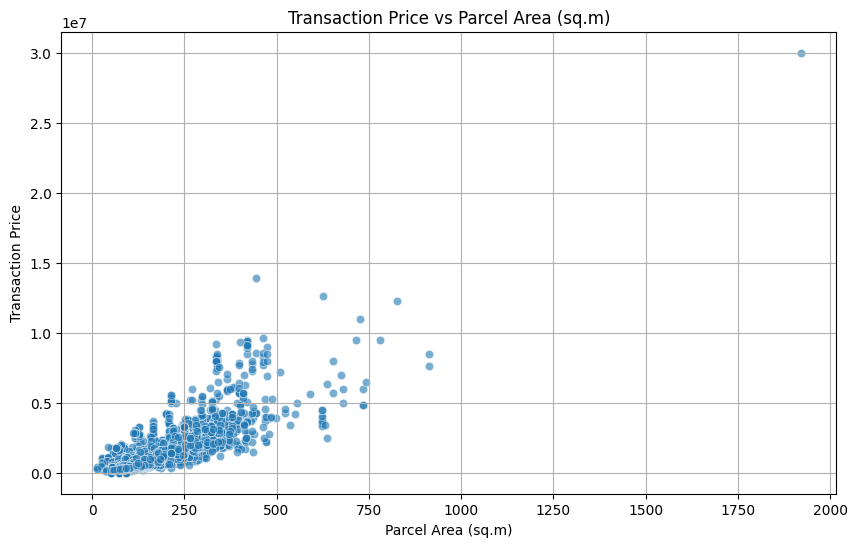

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Parcel_sq_m', y='TransactionPrice', alpha=0.6)
plt.title('Transaction Price vs Parcel Area (sq.m)')
plt.xlabel('Parcel Area (sq.m)')
plt.ylabel('Transaction Price')
plt.grid(True)
plt.show()

# Plot - Price vs Unit Level

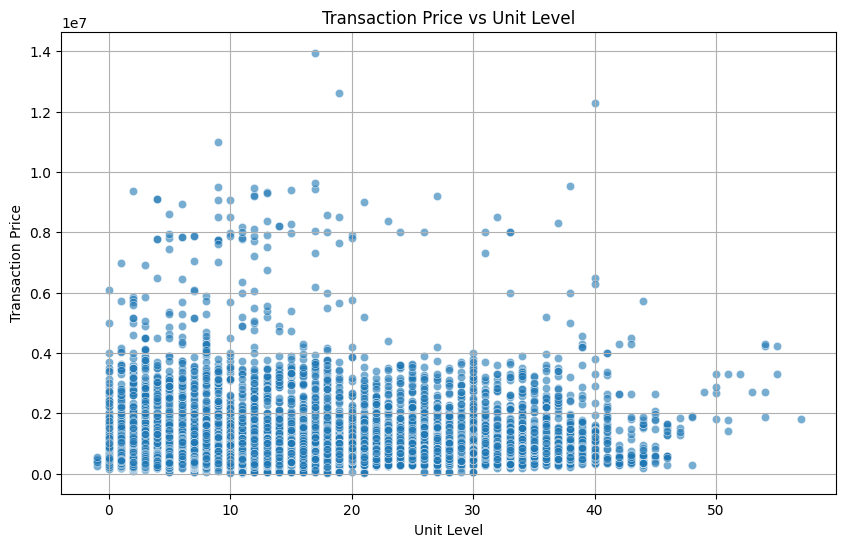

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='UnitLevel', y='TransactionPrice', alpha=0.6)
plt.title('Transaction Price vs Unit Level')
plt.xlabel('Unit Level')
plt.ylabel('Transaction Price')
plt.grid(True)
plt.show()

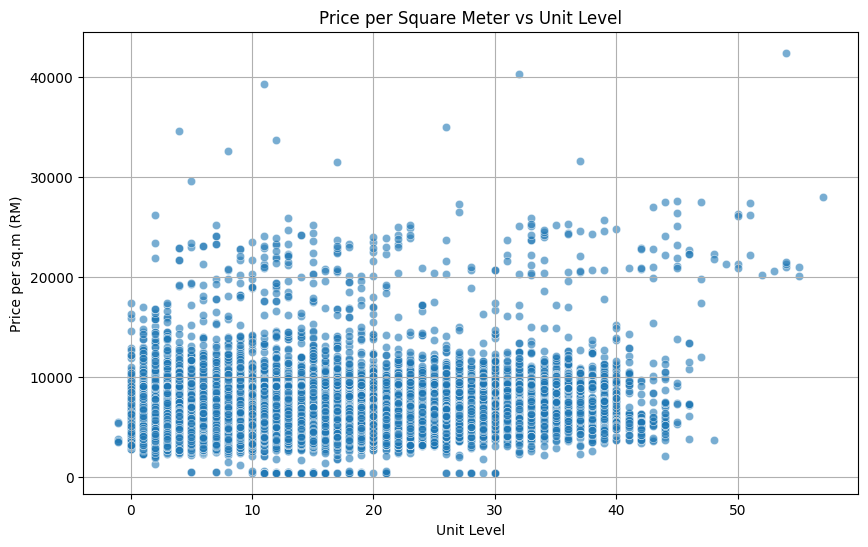

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='UnitLevel', y='Price_per_sq_m', alpha=0.6)
plt.title('Price per Square Meter vs Unit Level')
plt.xlabel('Unit Level')
plt.ylabel('Price per sq.m (RM)')
plt.grid(True)

# Set y-axis formatter to non-decimal
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

plt.show()

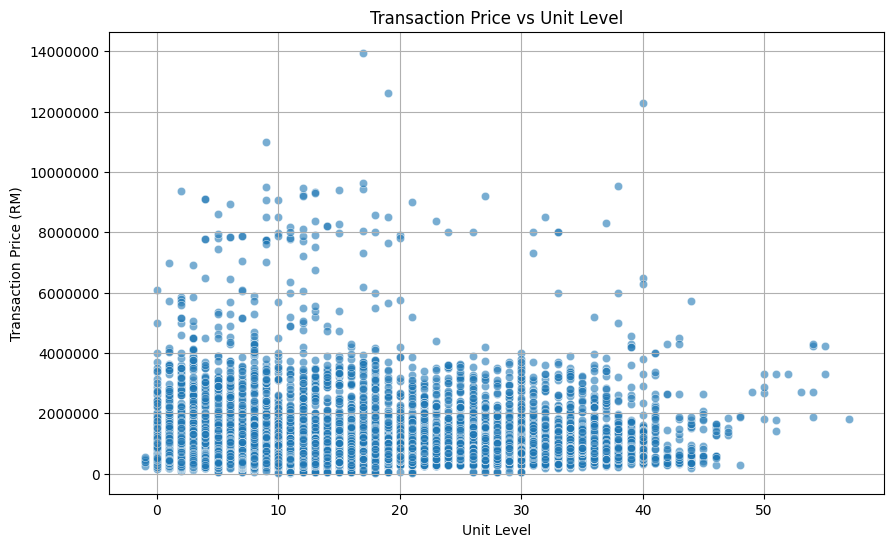

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker # Import ticker

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='UnitLevel', y='TransactionPrice', alpha=0.6)
plt.title('Transaction Price vs Unit Level')
plt.xlabel('Unit Level')
plt.ylabel('Transaction Price (RM)') # Explicitly added unit
plt.grid(True)

# Set y-axis formatter to non-decimal
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

plt.show()

# Boxplot Pirce vs Mukim

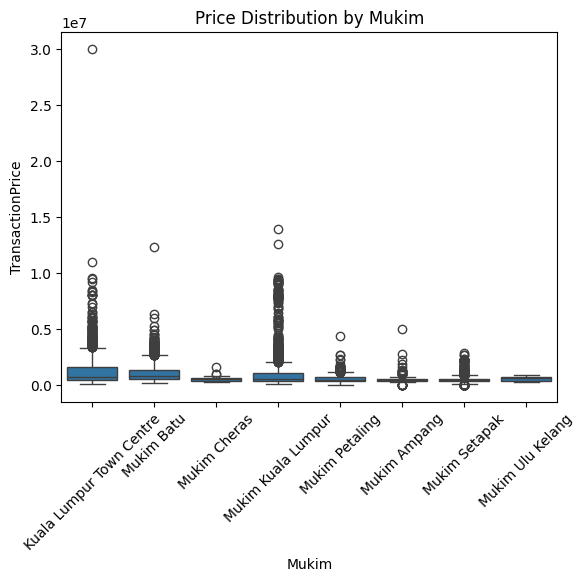

In [ ]:
import seaborn as sns
sns.boxplot(x='Mukim', y='TransactionPrice', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Mukim')
plt.show()

# Plot - Mukim vs Tenure

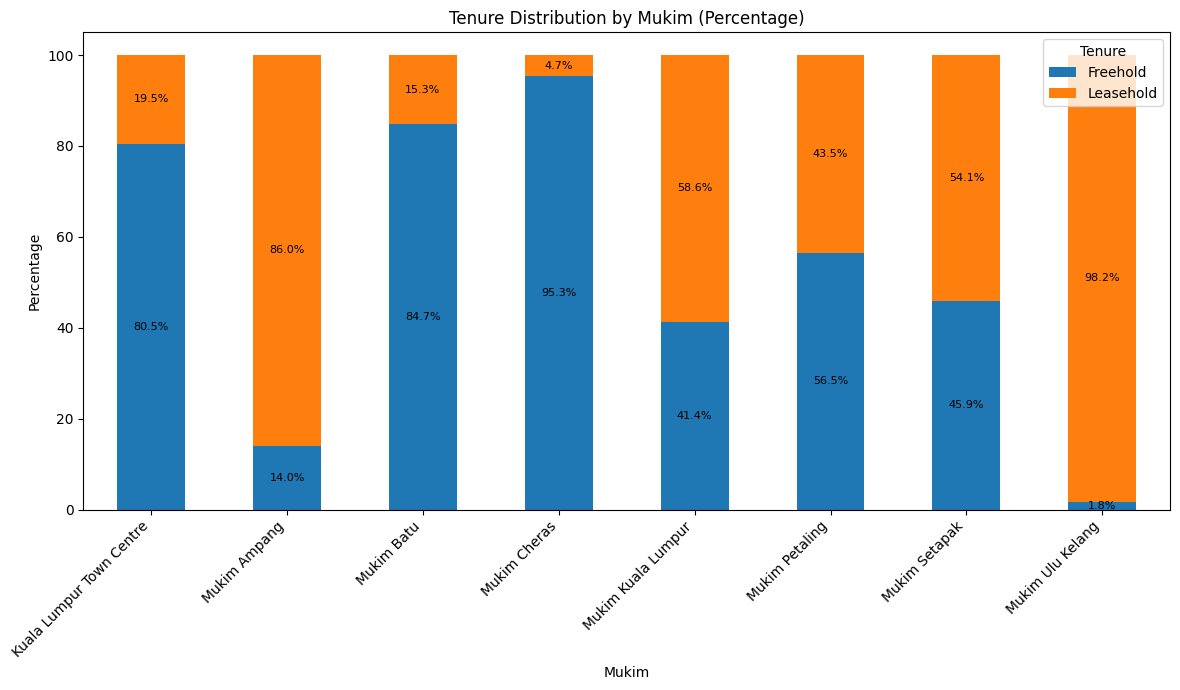

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the cross-tabulation with percentages
mukim_tenure_crosstab = pd.crosstab(df_cleaned['Mukim'], df_cleaned['Tenure'], normalize='index') * 100

# Plot the stacked bar chart
ax = mukim_tenure_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7))

# Add labels and title
plt.title('Tenure Distribution by Mukim (Percentage)')
plt.xlabel('Mukim')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tenure')

# Add percentage labels on the bars
for container in ax.containers:
    for j, rect in enumerate(container.patches):
        width = rect.get_width()
        height = rect.get_height()
        x, y = rect.get_xy()
        if height > 0:  # Only add text for bars with positive height
            ax.text(x + width / 2., y + height / 2.,
                    f'{height:.1f}%',
                    ha='center',
                    va='center',
                    fontsize=8,
                    color='black')

plt.tight_layout()
plt.show()

# Plot - Mukim vs Year

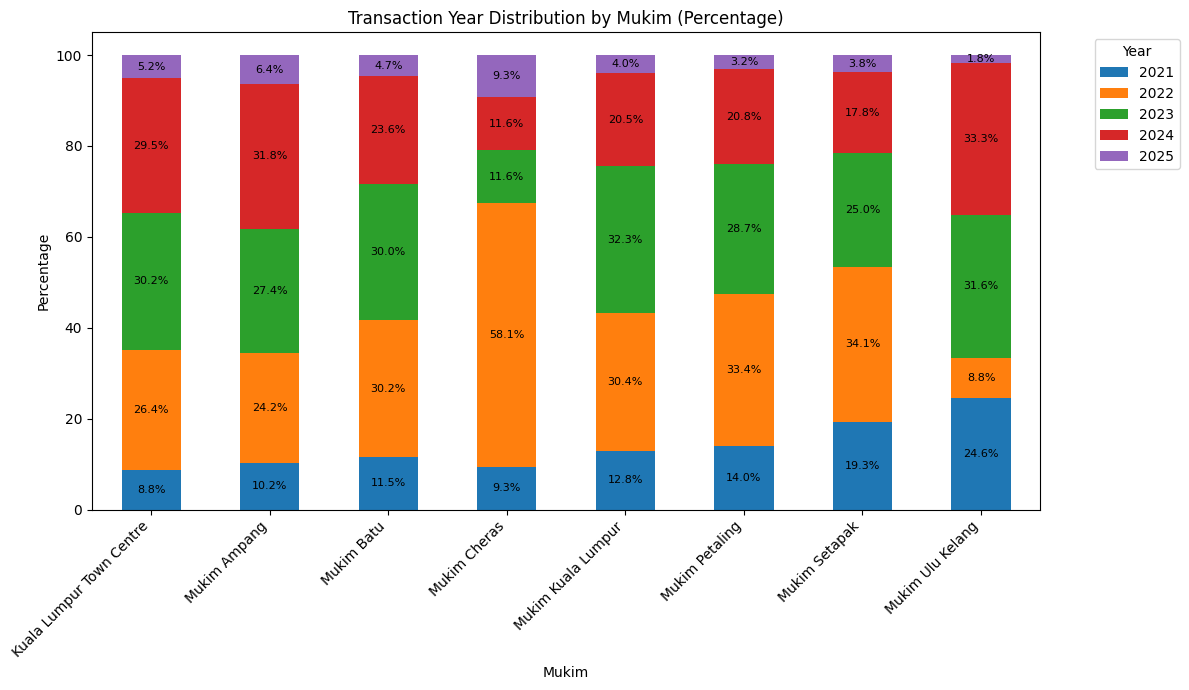

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the cross-tabulation with percentages
mukim_year_crosstab = pd.crosstab(df_cleaned['Mukim'], df_cleaned['Year'], normalize='index') * 100

# Plot the stacked bar chart
ax = mukim_year_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7))

# Add labels and title
plt.title('Transaction Year Distribution by Mukim (Percentage)')
plt.xlabel('Mukim')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on the bars
for container in ax.containers:
    for j, rect in enumerate(container.patches):
        width = rect.get_width()
        height = rect.get_height()
        x, y = rect.get_xy()
        if height > 0:  # Only add text for bars with positive height
            ax.text(x + width / 2., y + height / 2.,
                    f'{height:.1f}%',
                    ha='center',
                    va='center',
                    fontsize=8,
                    color='black')

plt.tight_layout()
plt.show()

# Mukim - Tenure - Year Crosstabs

In [ ]:
print(pd.crosstab([df_cleaned['Mukim'], df_cleaned['Tenure']], df_cleaned['Year'], normalize='index') * 100)

Year                                     2021        2022       2023  \
Mukim                    Tenure                                        
Kuala Lumpur Town Centre Freehold    7.577640   26.397516  30.372671   
                         Leasehold  13.846154   26.153846  29.487179   
Mukim Ampang             Freehold   31.818182   31.818182   9.090909   
                         Leasehold   6.666667   22.962963  30.370370   
Mukim Batu               Freehold   11.302211   29.207617  29.883292   
                         Leasehold  12.457338   35.665529  30.887372   
Mukim Cheras             Freehold    9.756098   56.097561  12.195122   
                         Leasehold   0.000000  100.000000   0.000000   
Mukim Kuala Lumpur       Freehold    9.120789   29.252260  32.128184   
                         Leasehold  15.469293   31.228273  32.444959   
Mukim Petaling           Freehold   13.887167   33.539988  27.650341   
                         Leasehold  14.078842   33.145615  30.08

# Mukim - Tenure - Year Plot

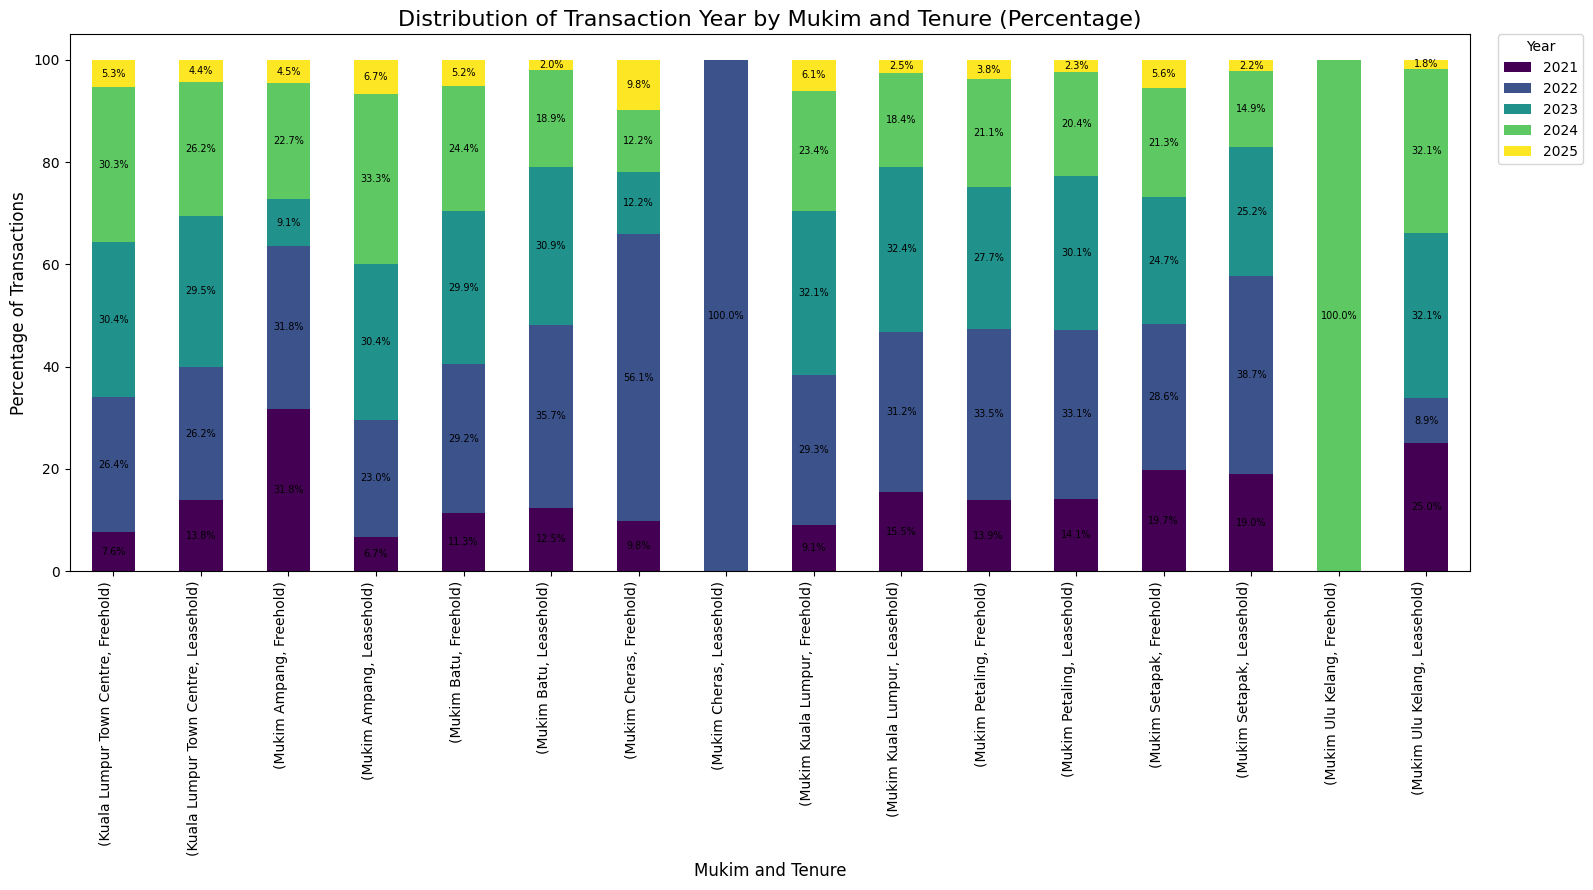

Plot generation and display attempt complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display # Import display

# Calculate the cross-tabulation with percentages
# The index will be a MultiIndex of Mukim and Tenure
# The columns will be Year
mukim_tenure_year_crosstab = pd.crosstab([df_cleaned['Mukim'], df_cleaned['Tenure']], df_cleaned['Year'], normalize='index') * 100

# Plot the stacked bar chart
# Increase figure size for better readability of multi-index and many bars
fig, ax = plt.subplots(figsize=(16, 9))
mukim_tenure_year_crosstab.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')

# Add labels and title
ax.set_title('Distribution of Transaction Year by Mukim and Tenure (Percentage)', fontsize=16)
ax.set_xlabel('Mukim and Tenure', fontsize=12)
ax.set_ylabel('Percentage of Transactions', fontsize=12)

# Rotate x-axis labels for better readability of the MultiIndex
plt.xticks(rotation=90, ha='right', fontsize=10)

# Position the legend outside the plot to avoid obscuring data
ax.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Add percentage labels on the bars for better interpretation
for container in ax.containers:
    labels = [f'{h:.1f}%' if h > 0 else '' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=7, color='black')

plt.tight_layout()
# Use display(fig) instead of plt.show() for explicit output in notebooks
display(fig)
print("Plot generation and display attempt complete.")

# Plot Price vs Scheme

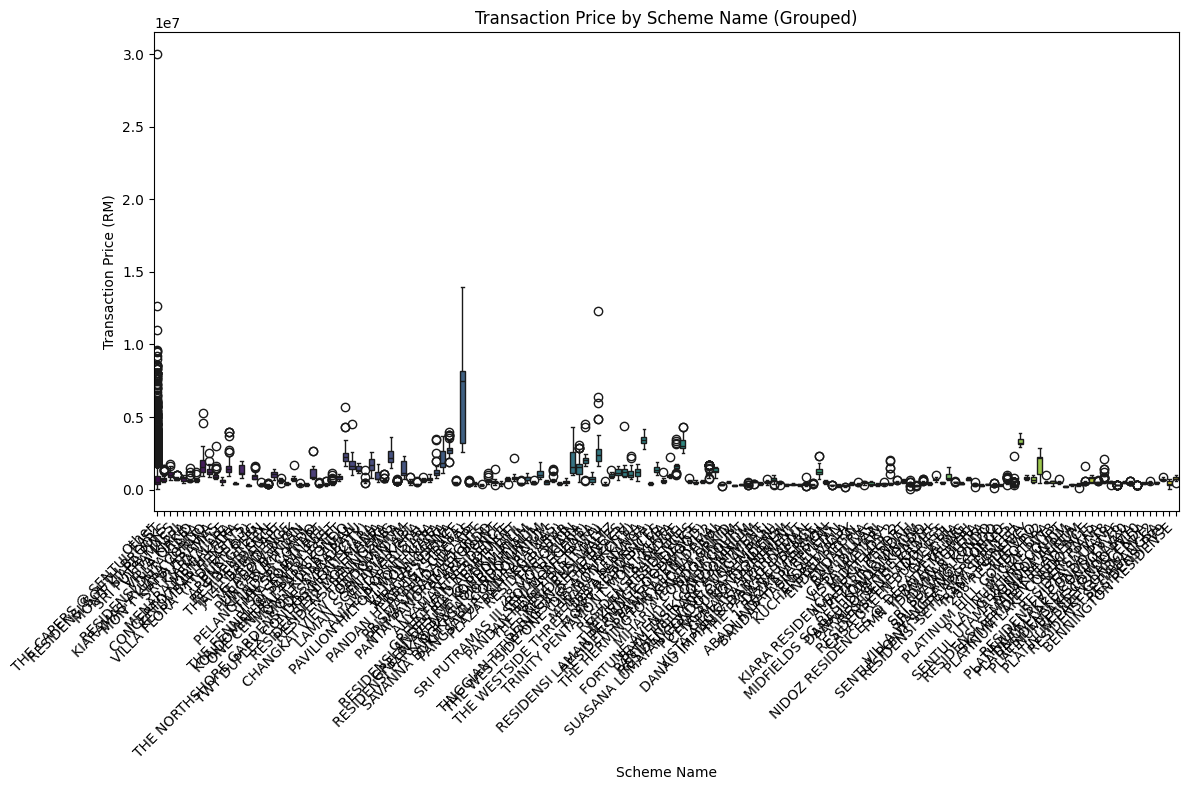

Summary statistics of Transaction Price by Scheme Name (Grouped):


,count,mean,std,min,25%,50%,75%,max
SchemeGroup,,,,,,,,
1 RAZAK MANSION,30.0,3.021333e+05,22147.987117,270000.0,290000.0,300000.0,308750.0,350000.0
10 MON'T KIARA,30.0,3.438700e+06,400923.085753,2800000.0,3177500.0,3400000.0,3650000.0,4200000.0
11 MONT KIARA,61.0,2.751984e+06,436824.468629,1888000.0,2500000.0,2700000.0,2900000.0,3962000.0
18 MADGE,33.0,3.132273e+06,476360.503763,2543000.0,2874000.0,2983000.0,3421000.0,4312000.0
28 MONT KIARA,63.0,2.046730e+06,542114.414967,610000.0,1830000.0,2008000.0,2150000.0,4550000.0
...,...,...,...,...,...,...,...,...
VILLA WANGSAMAS CONDO,103.0,5.181068e+05,110491.496667,300000.0,460000.0,490000.0,550000.0,1000000.0
VISTA ANGKASA APARTMENT,48.0,3.879167e+05,100210.381535,220000.0,350000.0,380000.0,431250.0,900000.0
VISTA KIARA,52.0,6.434423e+05,163030.781824,490000.0,577500.0,603000.0,637000.0,1500000.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv")

# Check for missing values in relevant columns
df = df[['SchemeName', 'TransactionPrice']].dropna()

# Group low-frequency scheme names into 'Other'
scheme_counts = df['SchemeName'].value_counts()
threshold = 30  # schemes with fewer than 30 transactions will be grouped
common_schemes = scheme_counts[scheme_counts >= threshold].index
df['SchemeGroup'] = df['SchemeName'].apply(lambda x: x if x in common_schemes else 'Other')

# Summary statistics
summary_stats = df.groupby('SchemeGroup')['TransactionPrice'].describe()

# Create boxplot using Seaborn (Matplotlib)
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
sns.boxplot(x='SchemeGroup', y='TransactionPrice', data=df, palette='viridis', hue='SchemeGroup', legend=False) # Using Seaborn for boxplot

# Add labels and title
plt.title('Transaction Price by Scheme Name (Grouped)')
plt.xlabel('Scheme Name')
plt.ylabel('Transaction Price (RM)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Display summary statistics in a tabular format
print("Summary statistics of Transaction Price by Scheme Name (Grouped):")
display(summary_stats)

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('Agg')

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv")

# Check for missing values in relevant columns
df = df[['SchemeName', 'TransactionPrice']].dropna()

# Group low-frequency scheme names into 'Other'
scheme_counts = df['SchemeName'].value_counts()
threshold = 30  # schemes with fewer than 30 transactions will be grouped
common_schemes = scheme_counts[scheme_counts >= threshold].index
df['SchemeGroup'] = df['SchemeName'].apply(lambda x: x if x in common_schemes else 'Other')

# Summary statistics
summary_stats = df.groupby('SchemeGroup')['TransactionPrice'].describe()

# Create boxplot using Plotly
fig = px.box(df, x='SchemeGroup', y='TransactionPrice', title='Transaction Price by Scheme Name (Grouped)',
             labels={'TransactionPrice': 'Transaction Price (RM)', 'SchemeGroup': 'Scheme Name'},
             points='outliers')
fig.update_layout(xaxis_tickangle=-45)

# Save plot
# fig.write_json('transaction_price_by_scheme.json')
# fig.write_image('transaction_price_by_scheme.png')
# fig.write_html('transaction_price_by_scheme.html')

fig.show()





In [ ]:
# Display summary statistics
print("Summary statistics of Transaction Price by Scheme Name (Grouped):")
display(summary_stats)

Summary statistics of Transaction Price by Scheme Name (Grouped):


,count,mean,std,min,25%,50%,75%,max
SchemeGroup,,,,,,,,
1 RAZAK MANSION,30.0,3.021333e+05,22147.987117,270000.0,290000.0,300000.0,308750.0,350000.0
10 MON'T KIARA,30.0,3.438700e+06,400923.085753,2800000.0,3177500.0,3400000.0,3650000.0,4200000.0
11 MONT KIARA,61.0,2.751984e+06,436824.468629,1888000.0,2500000.0,2700000.0,2900000.0,3962000.0
18 MADGE,33.0,3.132273e+06,476360.503763,2543000.0,2874000.0,2983000.0,3421000.0,4312000.0
28 MONT KIARA,63.0,2.046730e+06,542114.414967,610000.0,1830000.0,2008000.0,2150000.0,4550000.0
...,...,...,...,...,...,...,...,...
VILLA WANGSAMAS CONDO,103.0,5.181068e+05,110491.496667,300000.0,460000.0,490000.0,550000.0,1000000.0
VISTA ANGKASA APARTMENT,48.0,3.879167e+05,100210.381535,220000.0,350000.0,380000.0,431250.0,900000.0
VISTA KIARA,52.0,6.434423e+05,163030.781824,490000.0,577500.0,603000.0,637000.0,1500000.0


# plot mean and median monthly transaction price

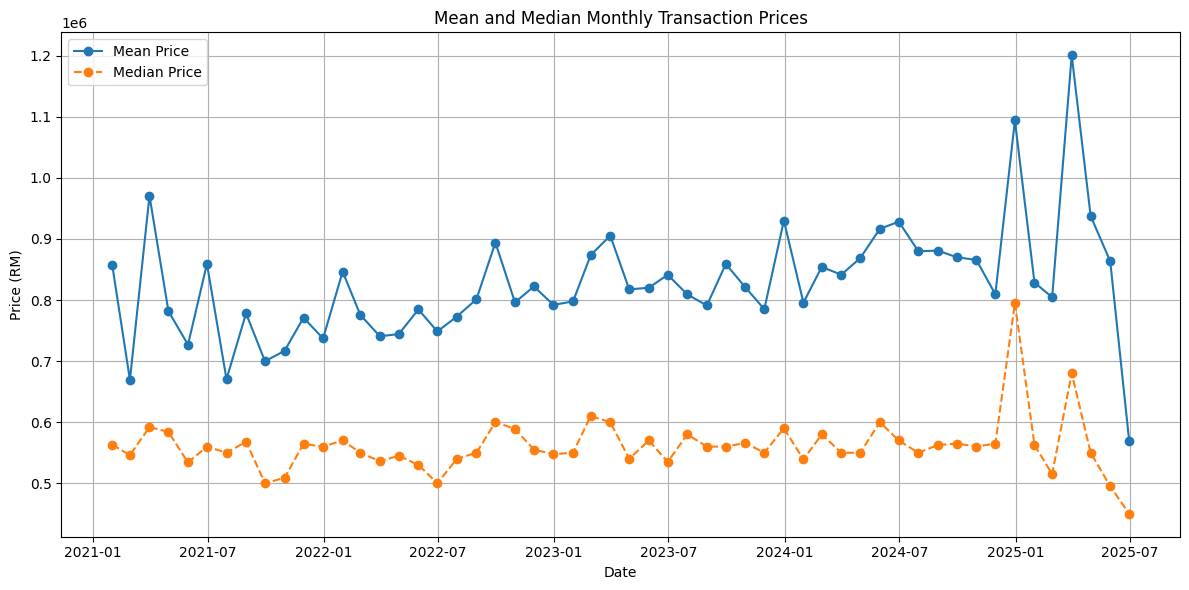

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load original dataset
url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"
try:
    df_raw = pd.read_csv(url)
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Convert TransactionDate to datetime
df_raw['TransactionDate'] = pd.to_datetime(df_raw['TransactionDate'], format='%b-%y')
df_raw.set_index('TransactionDate', inplace=True)
df_raw.sort_index(inplace=True)

# Remove outliers (1st–99th percentiles for TransactionPrice)
price_lower, price_upper = df_raw['TransactionPrice'].quantile([0.01, 0.99])
df_clean = df_raw[(df_raw['TransactionPrice'] >= price_lower) & (df_raw['TransactionPrice'] <= price_upper)].copy() # Use .copy() to avoid SettingWithCopyWarning

# Aggregate by month (mean and median TransactionPrice)
monthly_data = df_clean.resample('ME').agg({
    'TransactionPrice': ['mean', 'median']
}).round(2)
monthly_data.columns = ['MeanPrice', 'MedianPrice']
monthly_data.reset_index(inplace=True)


# Ensure no missing months
date_range = pd.date_range(start=monthly_data['TransactionDate'].min(), end=monthly_data['TransactionDate'].max(), freq='ME')
monthly_data = monthly_data.set_index('TransactionDate').reindex(date_range).ffill().reset_index() # Use .ffill()
monthly_data.rename(columns={'index': 'Date'}, inplace=True) # Rename the index column to 'Date' after reset


# Plot mean and median monthly transaction prices
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['MeanPrice'], label='Mean Price', marker='o', linestyle='-')
plt.plot(monthly_data['Date'], monthly_data['MedianPrice'], label='Median Price', marker='o', linestyle='--')

plt.title('Mean and Median Monthly Transaction Prices')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# XXXXXX

# Bivariante Analysis
## Part 1 - Numerical variables Vs. Transaction Price

*   Land/Parcel Area
*   Main Floor Area
*   Transaction Date







Drive already mounted


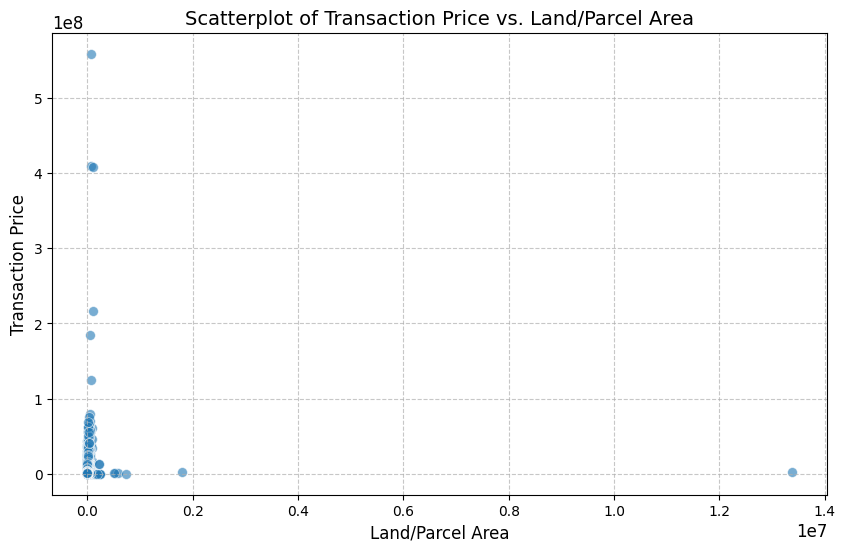

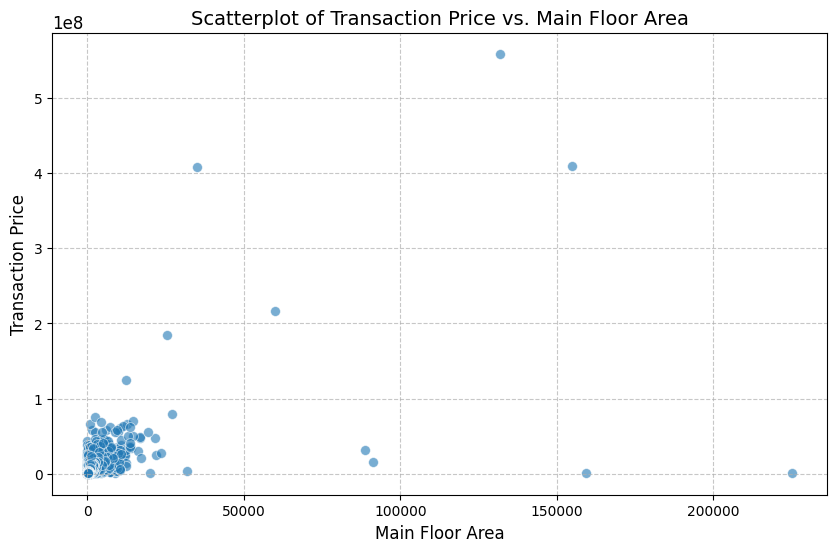

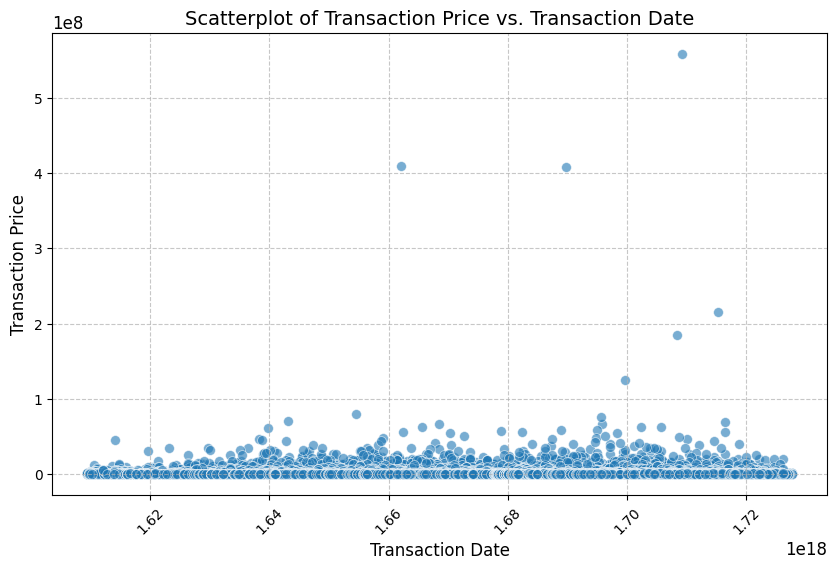

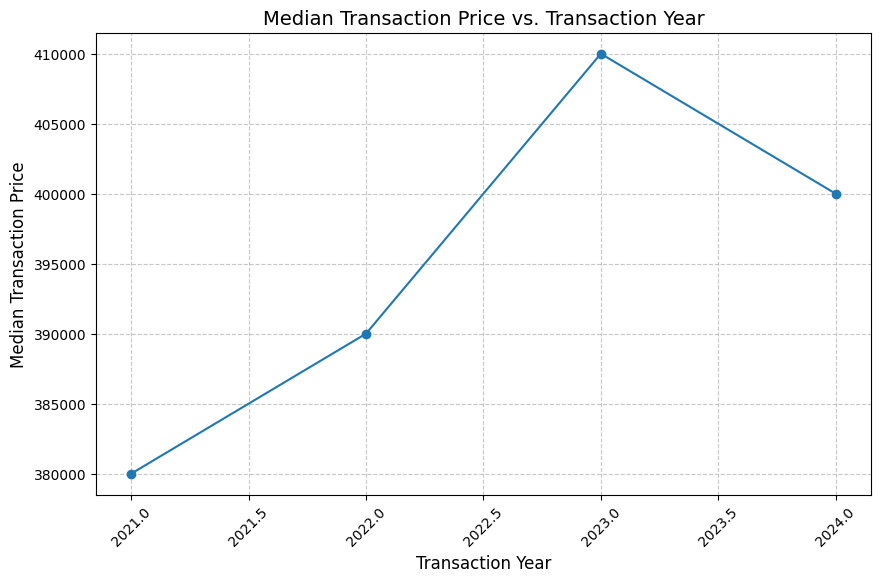

<ipython-input-21-5c00023abadd>:124: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_prices_by_bin = df.groupby('Area Bin')['Transaction Price'].median()


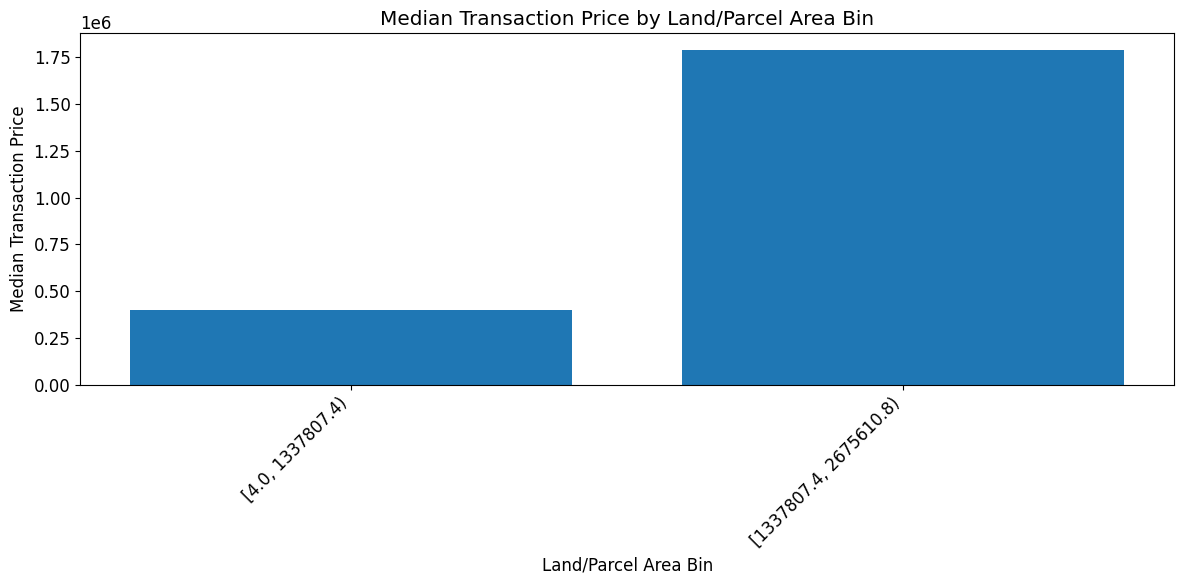

<ipython-input-21-5c00023abadd>:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_prices_by_bin = df.groupby('Main Floor Area Bin')['Transaction Price'].median()


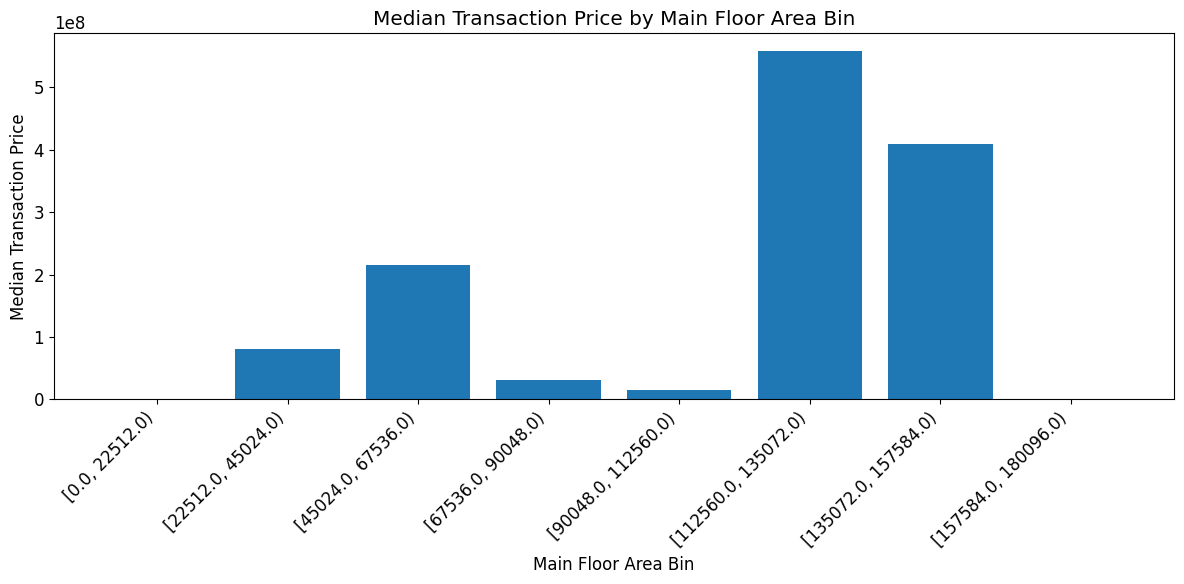

In [ ]:
# mount google drive where the datafile is stored
from google.colab import drive
import os

if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')
else:
  print("Drive already mounted")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv('/content/drive/MyDrive/dataset/houseprice_Cleaned_LogTransformed_OutlierRemoved.csv')  # load CSV
df = pd.read_csv('/content/drive/MyDrive/dataset/houseprice_Cleaned.csv')  # load CSV

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.scatterplot(data=df, x='Land/Parcel Area', y='Transaction Price', alpha=0.6, s=50) # Adjust marker size and transparency


# Add labels and title
plt.xlabel('Land/Parcel Area', fontsize=12)
plt.ylabel('Transaction Price', fontsize=12)
plt.title('Scatterplot of Transaction Price vs. Land/Parcel Area', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)


# Improve tick label visibility
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.scatterplot(data=df, x='Main Floor Area', y='Transaction Price', alpha=0.6, s=50) # Adjust marker size and transparency


# Add labels and title
plt.xlabel('Main Floor Area', fontsize=12)
plt.ylabel('Transaction Price', fontsize=12)
plt.title('Scatterplot of Transaction Price vs. Main Floor Area', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)


# Improve tick label visibility
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Transaction Date', y='Transaction Price', alpha=0.6, s=50)

# Add labels and title
plt.xlabel('Transaction Date', fontsize=12)
plt.ylabel('Transaction Price', fontsize=12)
plt.title('Scatterplot of Transaction Price vs. Transaction Date', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve tick label visibility
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for better readability if needed
plt.yticks(fontsize=10)

# Show the plot
plt.show()

# prompt: plot a line graph for median transaction price vs transaction years

# Assuming 'Transaction Date' is a datetime column. If not, convert it first.
df['Transaction Year'] = pd.to_datetime(df['Transaction Date']).dt.year

# Group by transaction year and calculate the median transaction price
median_prices_by_year = df.groupby('Transaction Year')['Transaction Price'].median()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(median_prices_by_year.index, median_prices_by_year.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Transaction Year', fontsize=12)
plt.ylabel('Median Transaction Price', fontsize=12)
plt.title('Median Transaction Price vs. Transaction Year', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve tick label visibility
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


# perform binning 10 interval for land/parcal area and plot bar chart against transaction price

# Calculate the intervals for binning
min_area = df['Land/Parcel Area'].min()
max_area = df['Land/Parcel Area'].max()
interval_size = (max_area - min_area) / 10
intervals = [min_area + i * interval_size for i in range(11)]

# Bin the 'Land/Parcel Area'
df['Area Bin'] = pd.cut(df['Land/Parcel Area'], bins=intervals, include_lowest=True, right=False)

# Group by area bin and calculate the median transaction price
median_prices_by_bin = df.groupby('Area Bin')['Transaction Price'].median()

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(median_prices_by_bin.index.astype(str), median_prices_by_bin.values)

# Customize the chart
plt.xlabel('Land/Parcel Area Bin')
plt.ylabel('Median Transaction Price')
plt.title('Median Transaction Price by Land/Parcel Area Bin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# perform binning  of 10 interval for main floor area and plot bar chart against transaction price

# Calculate the intervals for binning
min_area = df['Main Floor Area'].min()
max_area = df['Main Floor Area'].max()
interval_size = (max_area - min_area) / 10
intervals = [min_area + i * interval_size for i in range(11)]

# Bin the 'Main Floor Area'
df['Main Floor Area Bin'] = pd.cut(df['Main Floor Area'], bins=intervals, include_lowest=True, right=False)

# Group by area bin and calculate the median transaction price
median_prices_by_bin = df.groupby('Main Floor Area Bin')['Transaction Price'].median()

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(median_prices_by_bin.index.astype(str), median_prices_by_bin.values)

# Customize the chart
plt.xlabel('Main Floor Area Bin')
plt.ylabel('Median Transaction Price')
plt.title('Median Transaction Price by Main Floor Area Bin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Part 2 - Categorical variables Vs. Transaction Price

*   Property Type
*   Property Type (strata)
*   Sector
*   State
*   District
*   Tenure



<ipython-input-22-9bc00a9457ea>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Property Type', y='Transaction Price', data=df, order=df.groupby('Property Type')['Transaction Price'].median().sort_values().index, palette="pastel") # Added color palette


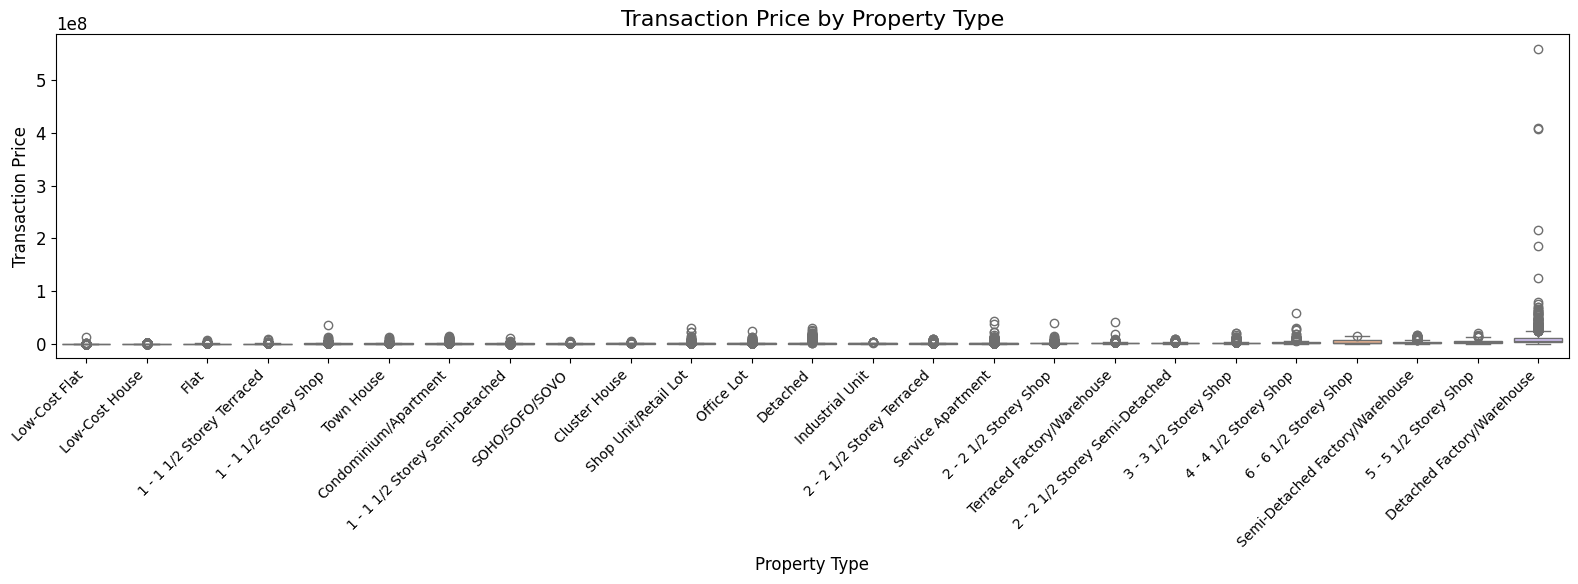

<ipython-input-22-9bc00a9457ea>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Property Type (strata)', y='Transaction Price', data=df,


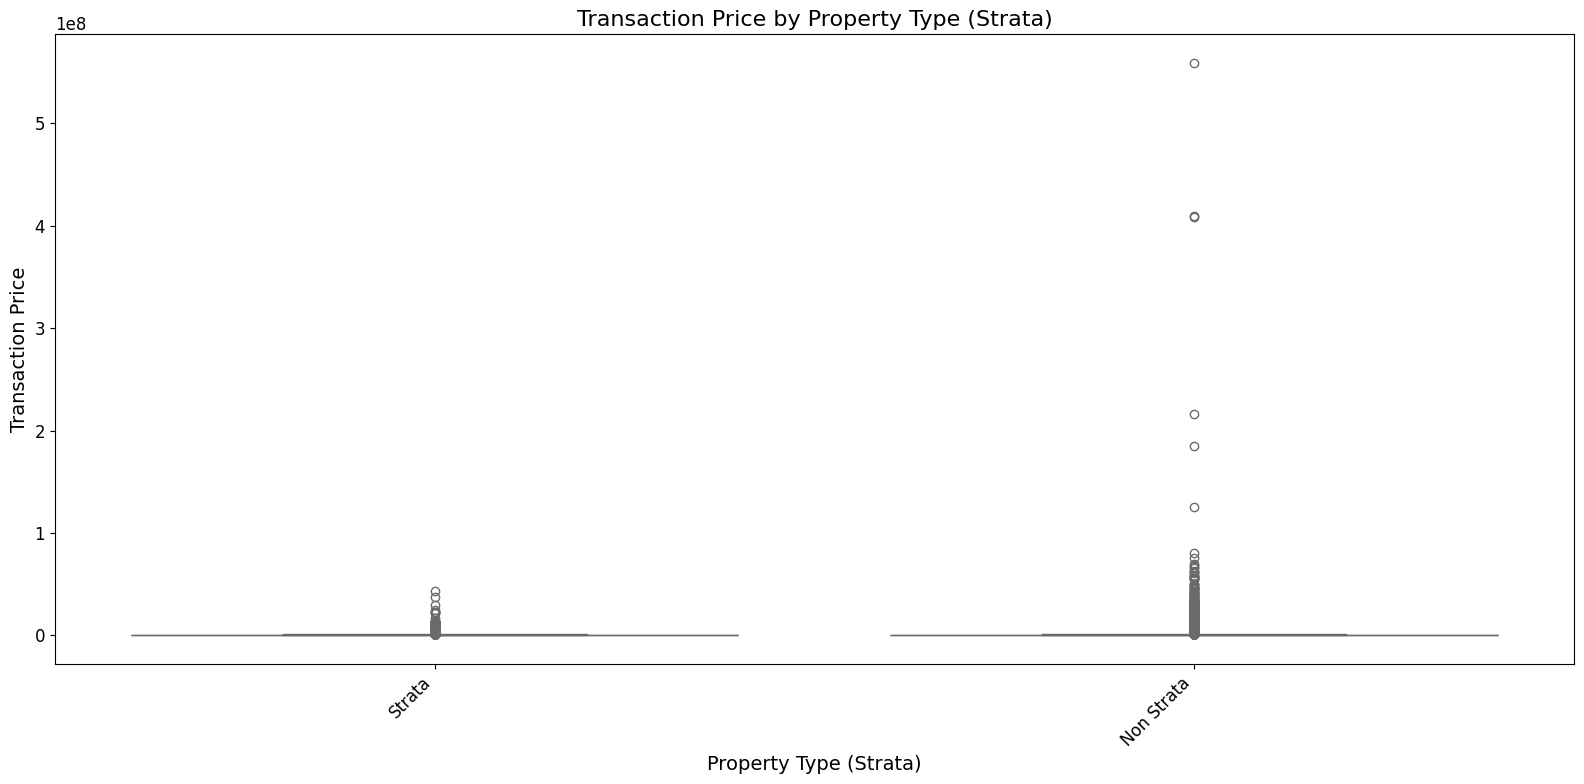

<ipython-input-22-9bc00a9457ea>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Transaction Price', data=df,


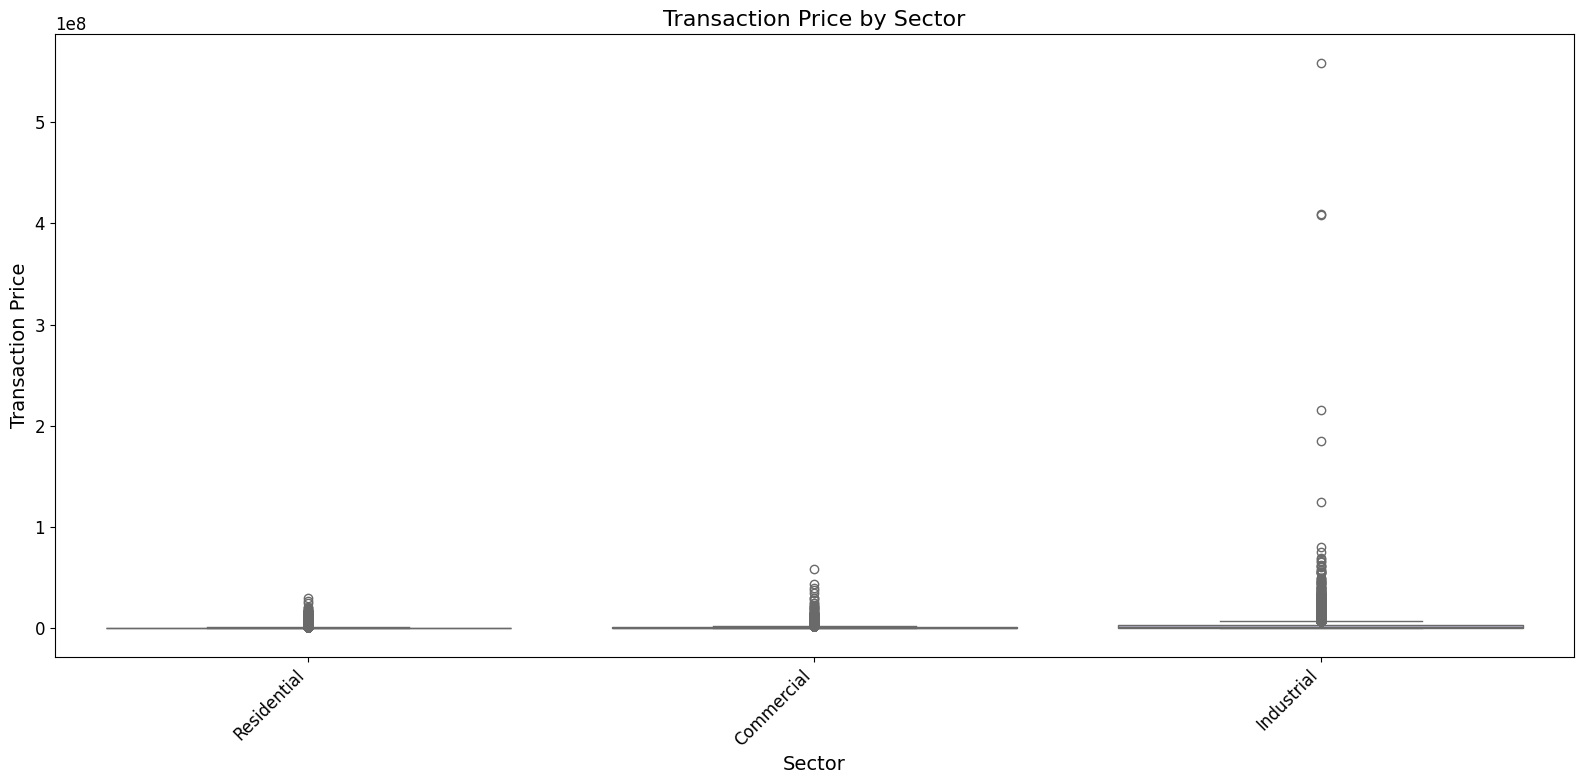

<ipython-input-22-9bc00a9457ea>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='Transaction Price', data=df,


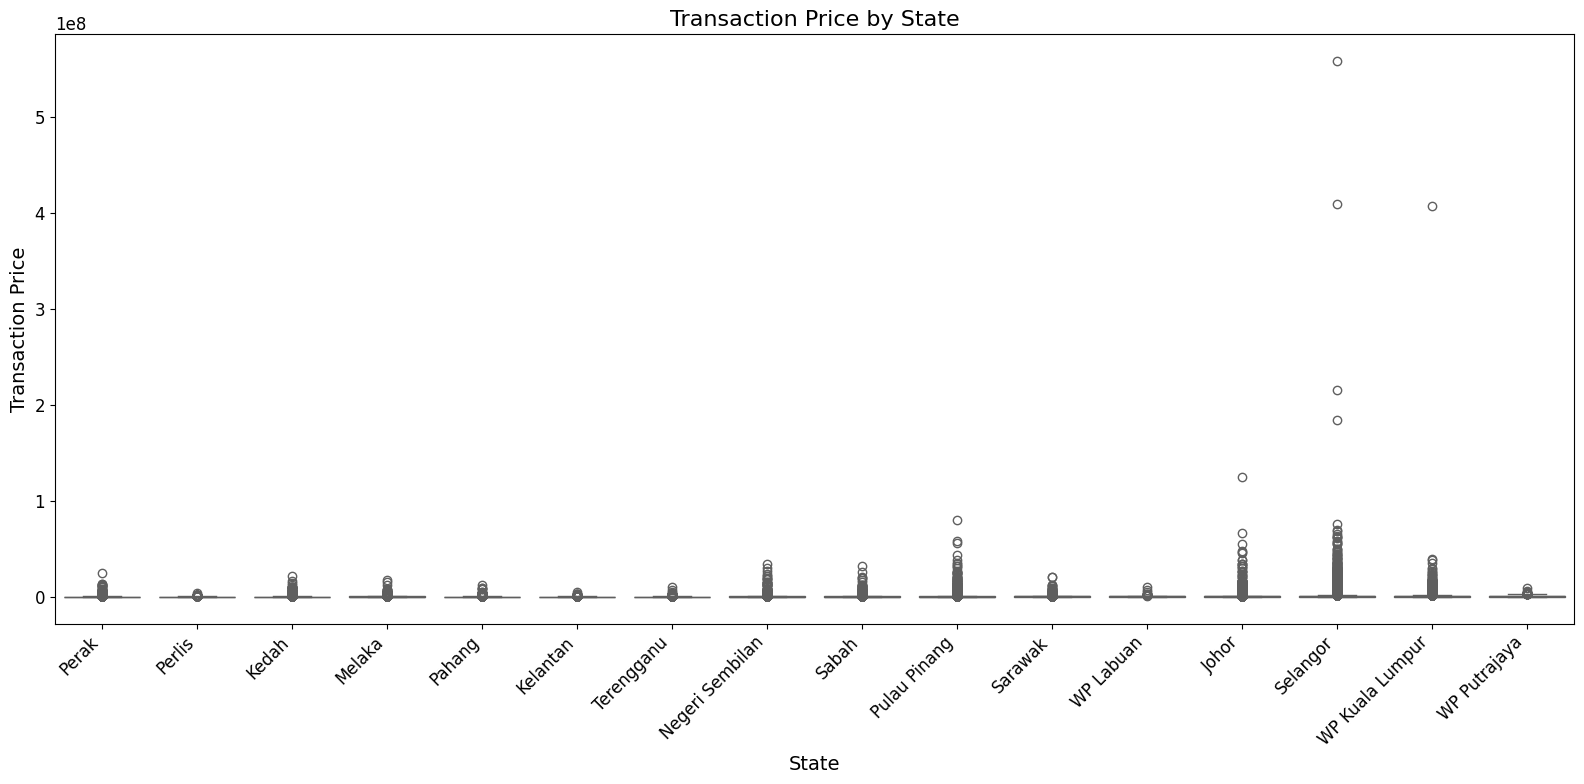

<ipython-input-22-9bc00a9457ea>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tenure', y='Transaction Price', data=df,


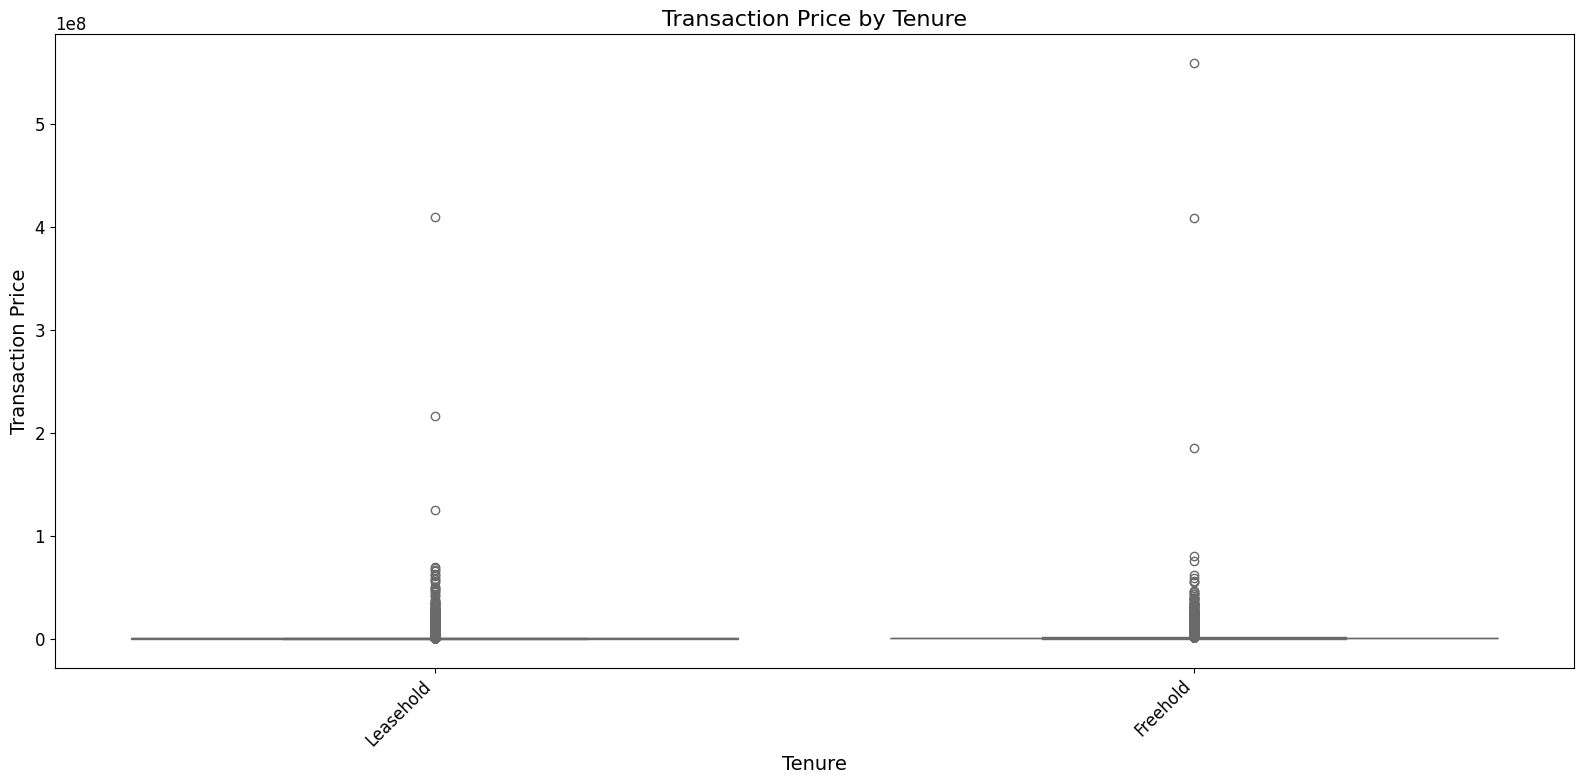

In [ ]:
# Plot settings for improved visualization
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 6)})  # Adjust font size and figure size

# Boxplot for Transaction Price by Property Type with improved visualization
plt.figure(figsize=(16, 6)) # Increased figure size
sns.boxplot(x='Property Type', y='Transaction Price', data=df, order=df.groupby('Property Type')['Transaction Price'].median().sort_values().index, palette="pastel") # Added color palette
plt.xticks(rotation=45, ha="right", fontsize=10) # Improved x-axis label readability
plt.title('Transaction Price by Property Type', fontsize=16)
plt.xlabel("Property Type", fontsize=12)
plt.ylabel("Transaction Price", fontsize=12)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Boxplot for Transaction Price by "Property Type (Strata)" with improved visualization
plt.figure(figsize=(16, 8))  # Adjust figure size for better readability
sns.boxplot(x='Property Type (strata)', y='Transaction Price', data=df,
            order=df.groupby('Property Type (strata)')['Transaction Price'].median().sort_values().index,
            palette="Set3")  # Use a different color palette

plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels and adjust font size
plt.title('Transaction Price by Property Type (Strata)', fontsize=16)
plt.xlabel('Property Type (Strata)', fontsize=14)
plt.ylabel('Transaction Price', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Boxplot for Transaction Price by "Sector" with improved visualization
plt.figure(figsize=(16, 8))  # Adjust figure size for better readability
sns.boxplot(x='Sector', y='Transaction Price', data=df,
            order=df.groupby('Sector')['Transaction Price'].median().sort_values().index,
            palette="Set3")  # Use a different color palette

plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels and adjust font size
plt.title('Transaction Price by Sector', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Transaction Price', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Boxplot for Transaction Price by "State" with improved visualization
plt.figure(figsize=(16, 8))  # Adjust figure size for better readability
sns.boxplot(x='State', y='Transaction Price', data=df,
            order=df.groupby('State')['Transaction Price'].median().sort_values().index,
            palette="Set3")  # Use a different color palette

plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels and adjust font size
plt.title('Transaction Price by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Transaction Price', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Boxplot for Transaction Price by "Tenure" with improved visualization
plt.figure(figsize=(16, 8))  # Adjust figure size for better readability
sns.boxplot(x='Tenure', y='Transaction Price', data=df,
            order=df.groupby('Tenure')['Transaction Price'].median().sort_values().index,
            palette="Set3")  # Use a different color palette

plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels and adjust font size
plt.title('Transaction Price by Tenure', fontsize=16)
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Transaction Price', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Task
```python
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the cross-tabulation with percentages
# The index will be a MultiIndex of Mukim and Tenure
# The columns will be Year
mukim_tenure_year_crosstab = pd.crosstab([df_cleaned['Mukim'], df_cleaned['Tenure']], df_cleaned['Year'], normalize='index') * 100

# Plot the stacked bar chart
# Increase figure size for better readability of multi-index and many bars
fig, ax = plt.subplots(figsize=(16, 9))
mukim_tenure_year_crosstab.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')

# Add labels and title
ax.set_title('Distribution of Transaction Year by Mukim and Tenure (Percentage)', fontsize=16)
ax.set_xlabel('Mukim and Tenure', fontsize=12)
ax.set_ylabel('Percentage of Transactions', fontsize=12)

# Rotate x-axis labels for better readability of the MultiIndex
plt.xticks(rotation=90, ha='right', fontsize=10)

# Position the legend outside the plot to avoid obscuring data
ax.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Add percentage labels on the bars for better interpretation
for container in ax.containers:
    labels = [f'{h:.1f}%' if h > 0 else '' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=7, color='black')

plt.tight_layout()
plt.show()
```

## Plot Mukim - Tenure - Year

### Subtask:
Generate a stacked bar chart showing the distribution of transaction years for each combination of Mukim and Tenure.


## Summary:

### Data Analysis Key Findings
*   The analysis successfully generated a stacked bar chart illustrating the percentage distribution of transaction years for each unique combination of Mukim and Tenure.
*   The chart provides a granular view, allowing for the identification of which years are most prominent for transactions within specific Mukim and Tenure types. For instance, some Mukim-Tenure pairs might exhibit a high concentration of transactions in recent years, while others could show activity spread across older periods, or even specific historical peaks.

### Insights or Next Steps
*   **Insight**: This distribution can indicate periods of significant development or market activity within particular Mukim-Tenure segments. For example, a high concentration of transactions in recent years for a specific Mukim and Tenure might suggest new developments or increased market interest in that area and property type.
*   **Next Steps**: Investigate the factors contributing to observed year concentrations (e.g., urban planning initiatives, economic trends, specific development projects) for Mukim-Tenure combinations showing distinct temporal patterns.
